In [1]:
#Bargainng
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import Estimate
import figure 
from EconModel import cpptools
import pickle
import statsmodels.api as sm
import seaborn as sns
#from binsreg import binsreg
from binsreg import *
from plotnine import *
from LimitedCommitmentModel import LimitedCommitmentModelClass

# plot style
linestyles = ['-','--','-.',':',':']
markers = ['o','s','D','*','P']
linewidth = 2
font_size = 17
font = {'size':font_size}
matplotlib.rc('font', **font)


plt.rcParams.update({'figure.max_open_warning': 0,'text.usetex': False})
path = 'output/'

SAVE = False

# c++ settings

do_compile = True
threads = 20
T = 20




In [2]:
name = 'model_NC'
model_name = "model_NC"
do_distr_yerror = "none"
do_yerror = 0
name_error = f'{do_distr_yerror}{do_yerror}std_Yerror'
#N = 16000 #MODEL_LC 
#N = 4000 #model NC
N = 3000
gender = "woman"
#name_error = "uni2std_Yerror"

specs = {}
#specs.update({f'test2':{'latexname':'limited', 'par':{ 'T':T, 'num_K': 5, 'num_A': 10 ,  'do_HK': False, 'threads':threads,'bargaining':0}}})


#specs.update({f'model_LC':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':1}}})
specs.update({f'model_NC':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':2}}})
#specs.update({f'model_FC':{'latexname':'limited', 'par':{ 'T':T,  'do_HK': False, 'simN': N,  'threads':threads,'bargaining':0}}})

# solve different models
models = {}
for m,(name,spec) in enumerate(specs.items()):
    
    # setup model
    model = LimitedCommitmentModelClass(name=name,par=spec['par'])
    model.spec = spec

    compile_now = True if do_compile & (m==0) else False
    model.link_to_cpp(force_compile=compile_now)
    

# setup model
#model = LimitedCommitmentModelClass(name=name)    
#model.link_to_cpp(force_compile=True)


#load par and sol
pickle_file = f'output/{name}_sol.pickle'

with open(pickle_file, 'rb') as f:
    model.sol = pickle.load(f)

pickle_file = f'output/{name}_par.pickle'

with open(pickle_file, 'rb') as f:
    model.par = pickle.load(f)
    model.par.simN = N

terminal:

(base) c:\Users\czk481\project\LimitedCommitmentTest-1>cd /d "C:/Program Files/Microsoft Visual Studio/2022/Community/VC/Auxiliary/Build/" 

(base) C:\Program Files\Microsoft Visual Studio\2022\Community\VC\Auxiliary\Build>call vcvarsall.bat x64 
**********************************************************************
** Visual Studio 2022 Developer Command Prompt v17.0.6
** Copyright (c) 2021 Microsoft Corporation
**********************************************************************
[vcvarsall.bat] Environment initialized for: 'x64'
solve.cpp
c:\Users\czk481\project\LimitedCommitmentTest-1\cppfuncs\index.cpp(76): warning C5208: unnamed class used in typedef name cannot declare members other than non-static data members, member enumerations, or member classes
setup_omp.cpp
Generating Code...
Microsoft (R) Incremental Linker Version 14.30.30709.0
Copyright (C) Microsoft Corporation.  All rights reserved.

/out:solve.dll 
/dll 
/implib:solve.lib 
solve.obj 
setup_omp.obj 
cppfu

RuntimeError: C++ files can not be compiled

In [ ]:
data = Estimate.create_data(model,start_p = 2, end_p = model.par.T-2, yerror = do_distr_yerror, scale_st = do_yerror )
data = Estimate.create_variable(data, model.par)
data = Estimate.aux_est(data,model.par)

data2 = data

#data2 = data2[data2['delta_log_barganing']< 0.5]
#data2 = data2[data2['delta_log_barganing']> -0.5]
#data2 = data2[data2['delta_log_barganing']!= 0]


_, wald_FC_w , wald_NC_w,  _,_,_ = Estimate.main_est(data,gender= "w", do_estimate_wage = "est_omega", print_reg = True, shadow_value_simple=2, do_control_love = False)


c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:237: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use 

                            OLS Regression Results                            
Dep. Variable:                    y_w   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     601.0
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        08:33:02   Log-Likelihood:                 28279.
No. Observations:               10509   AIC:                        -5.612e+04
Df Residuals:                   10288   BIC:                        -5.451e+04
Df Model:                         220                                         
Covariance Type:              cluster                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4222 

wage_shock


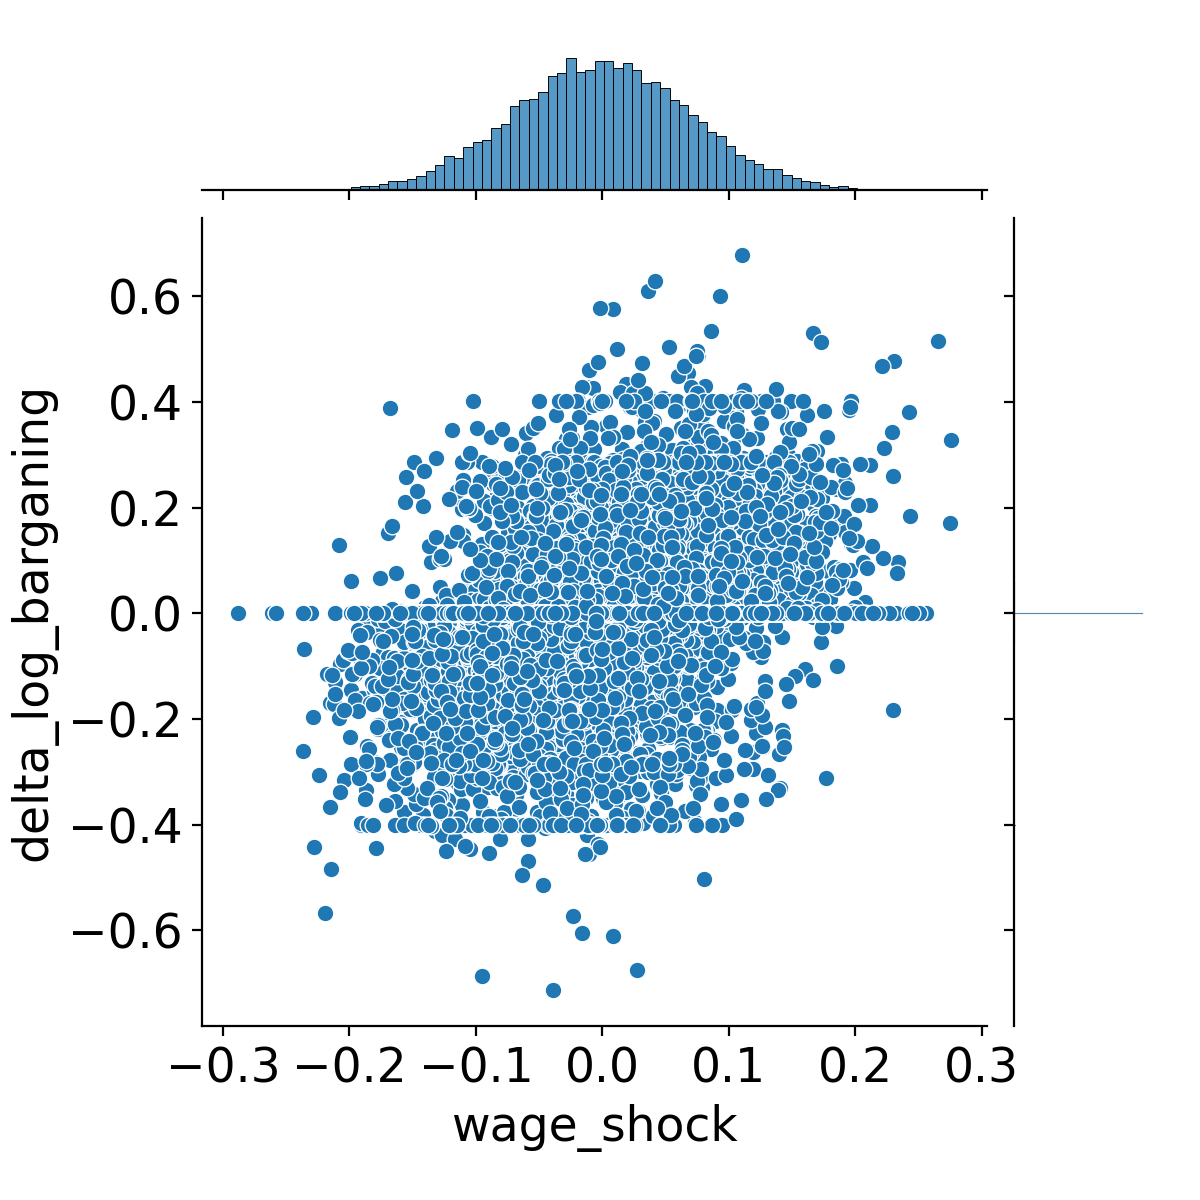

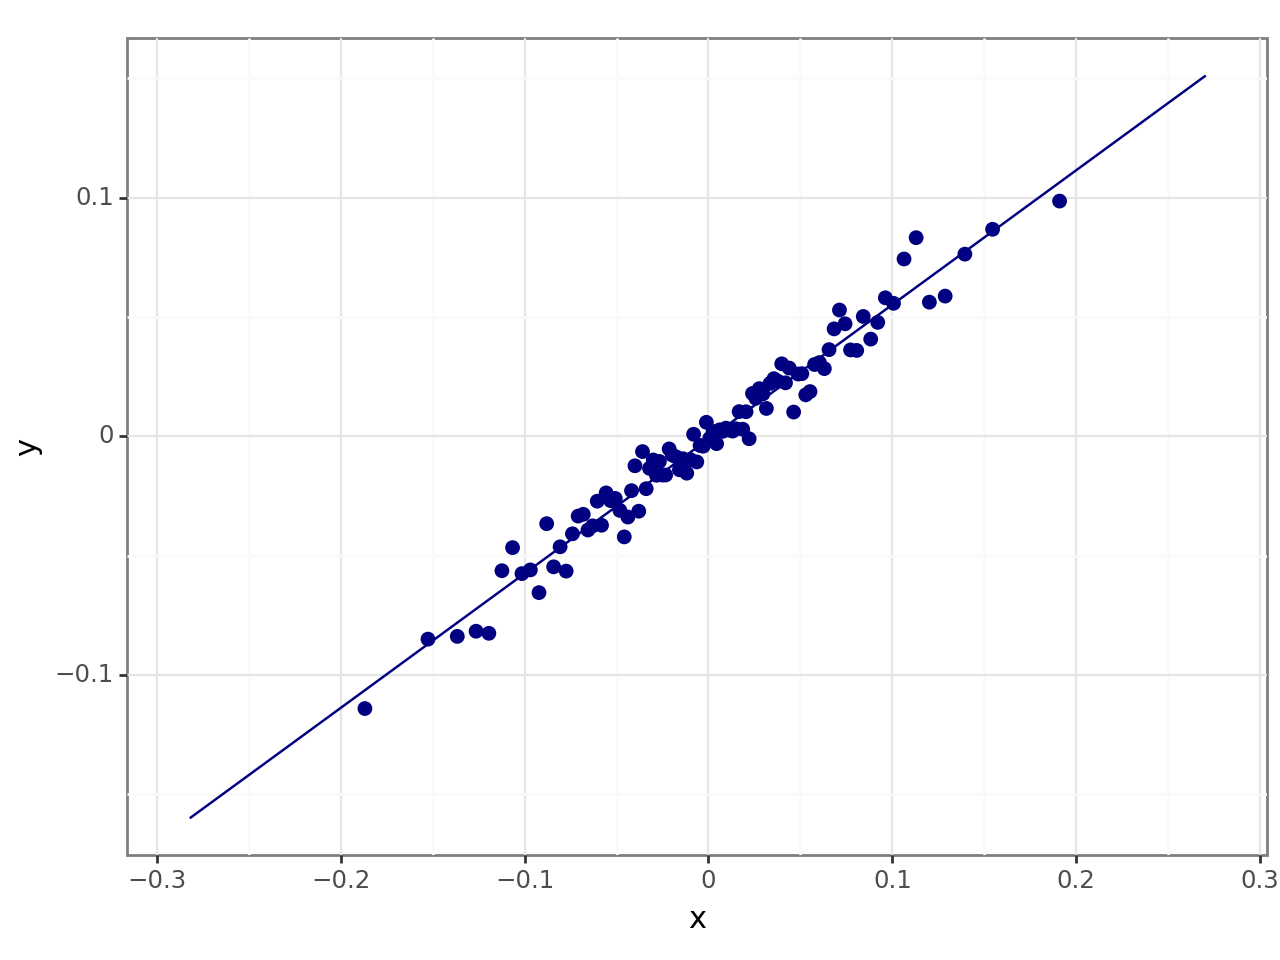


wage_shock_j


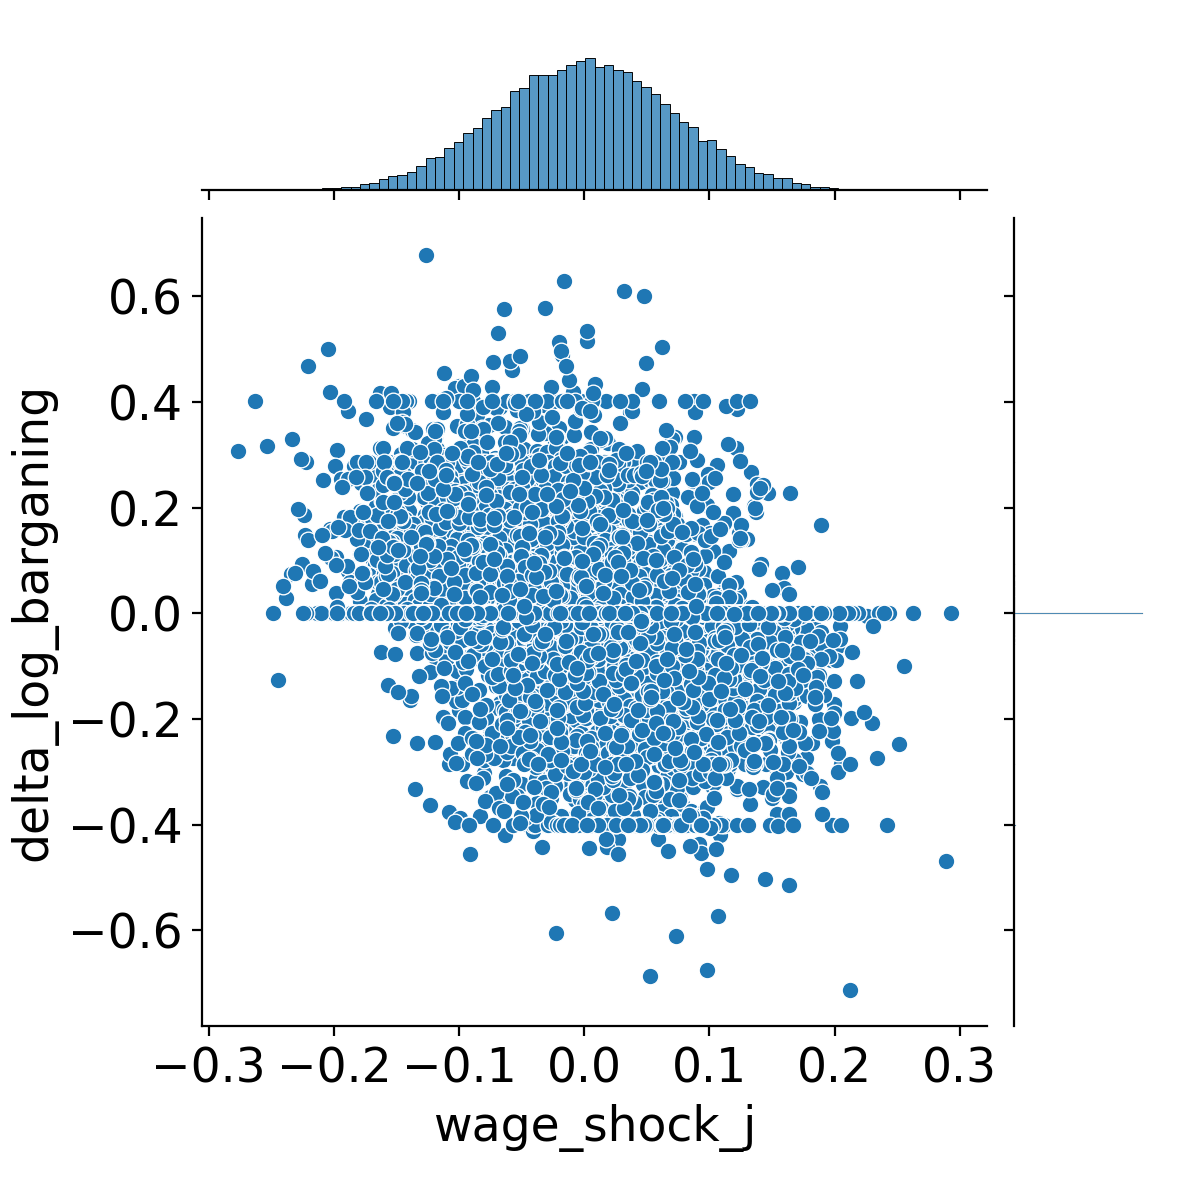

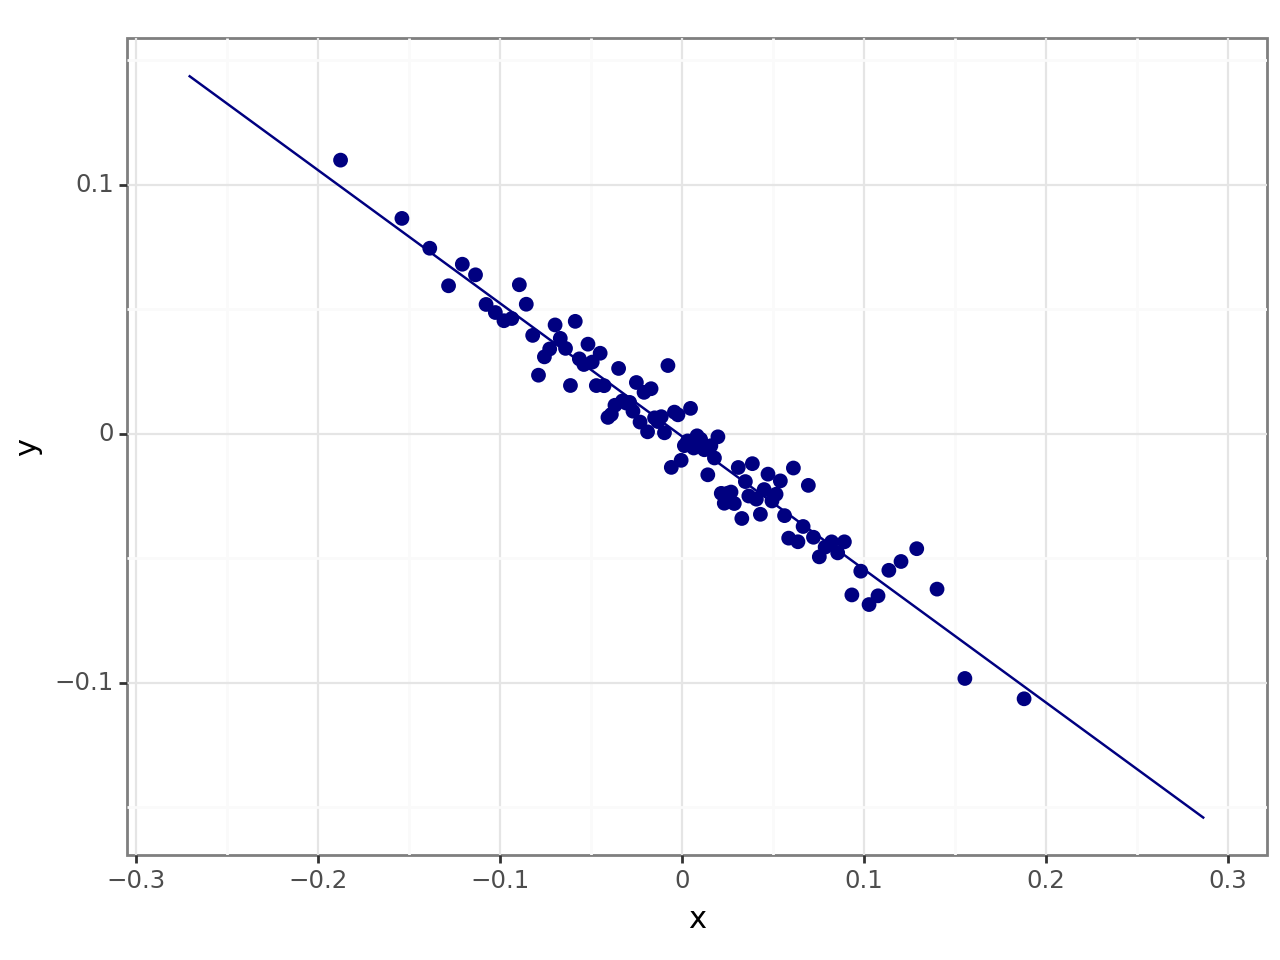


delta_log_wealth


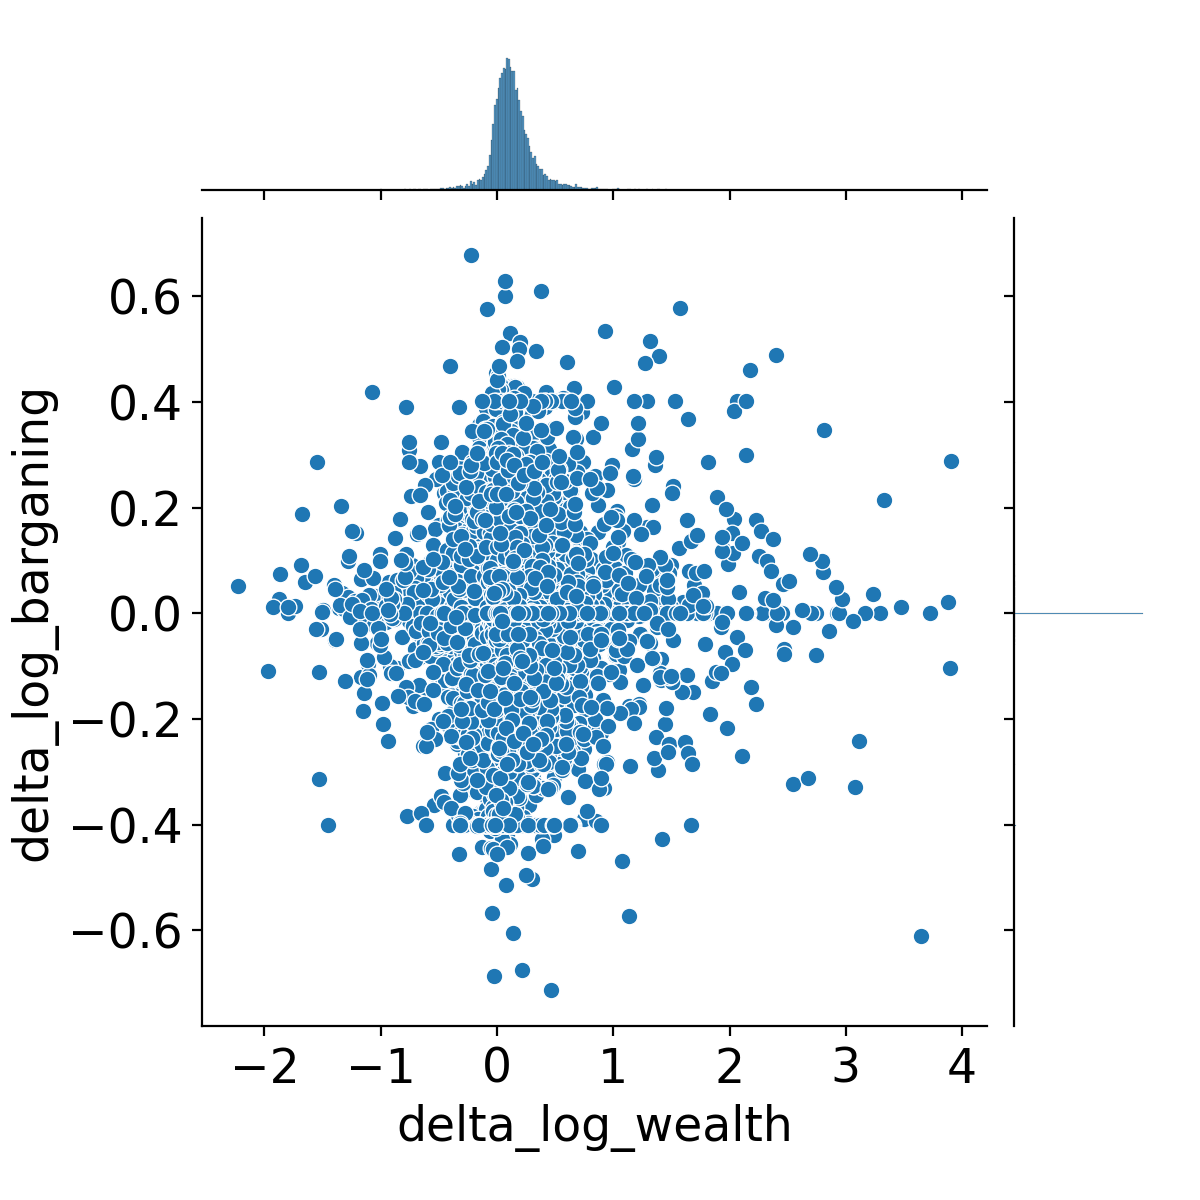

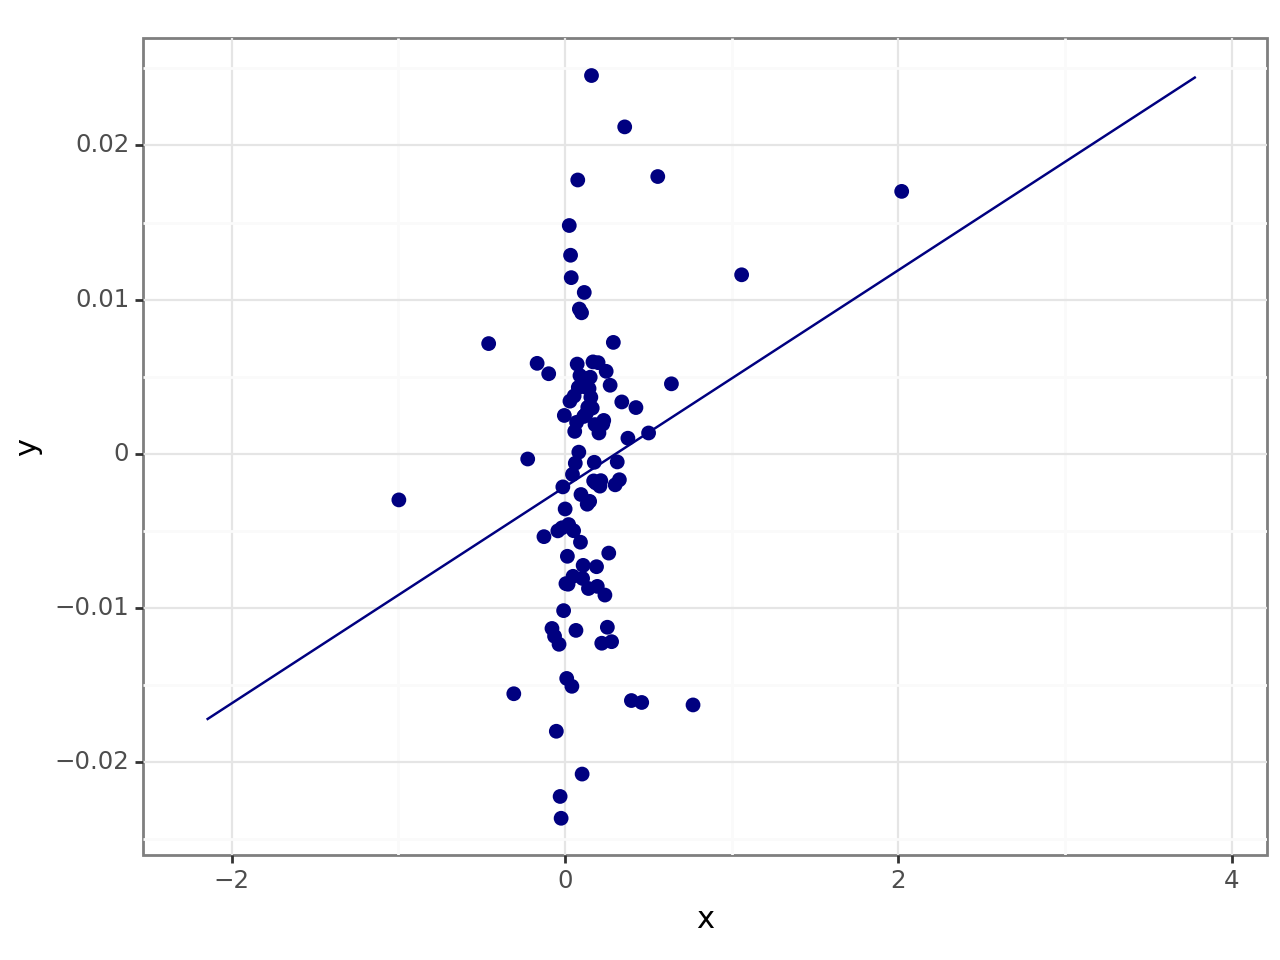


delta_log_Love


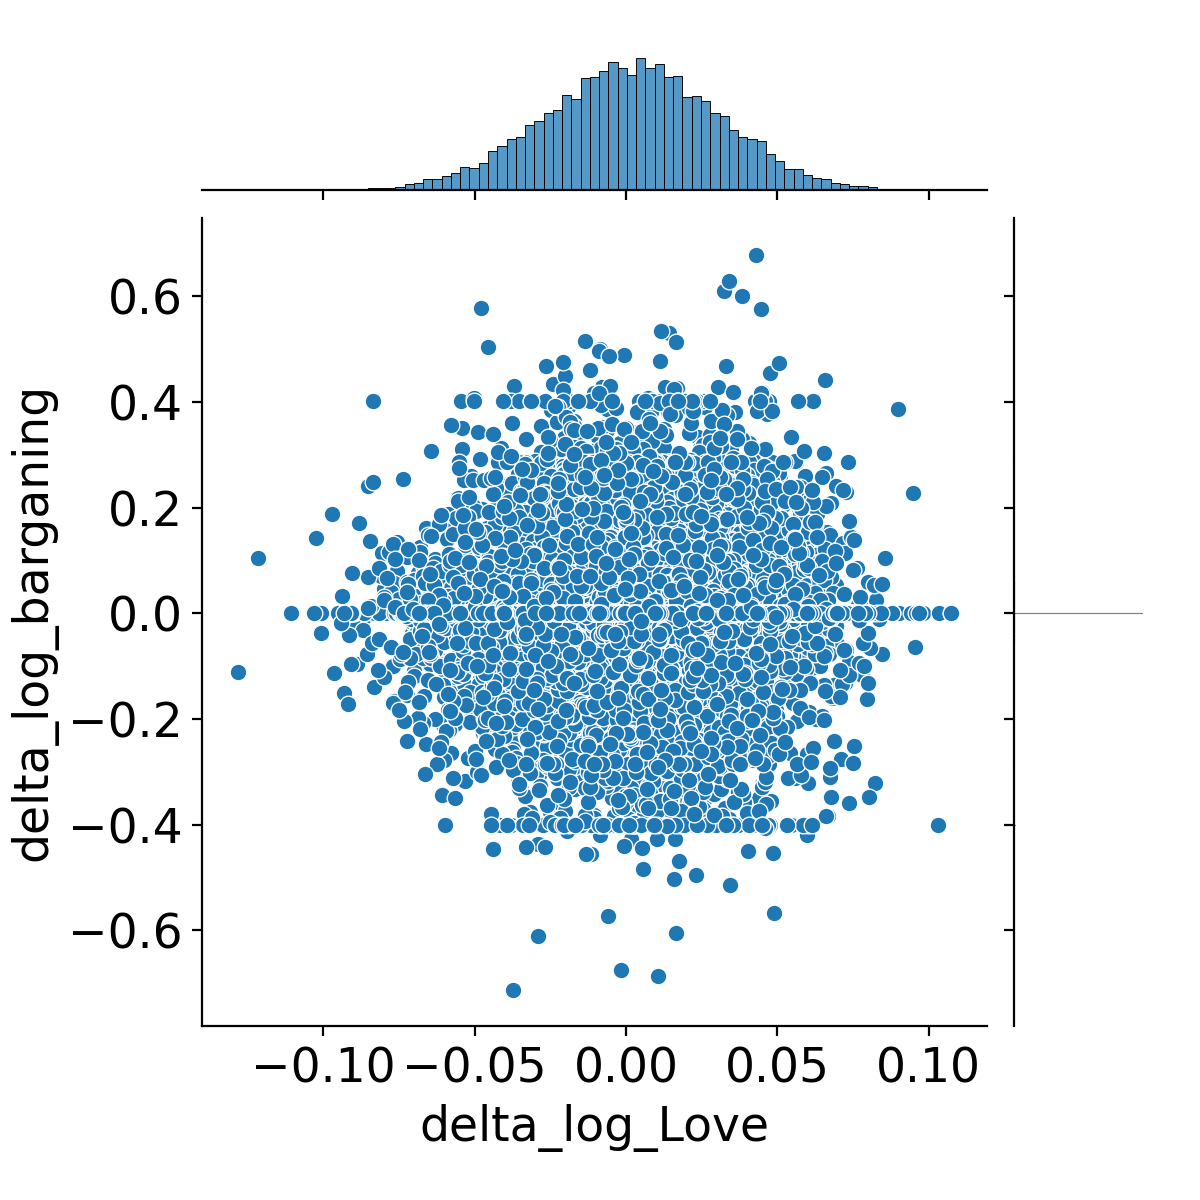

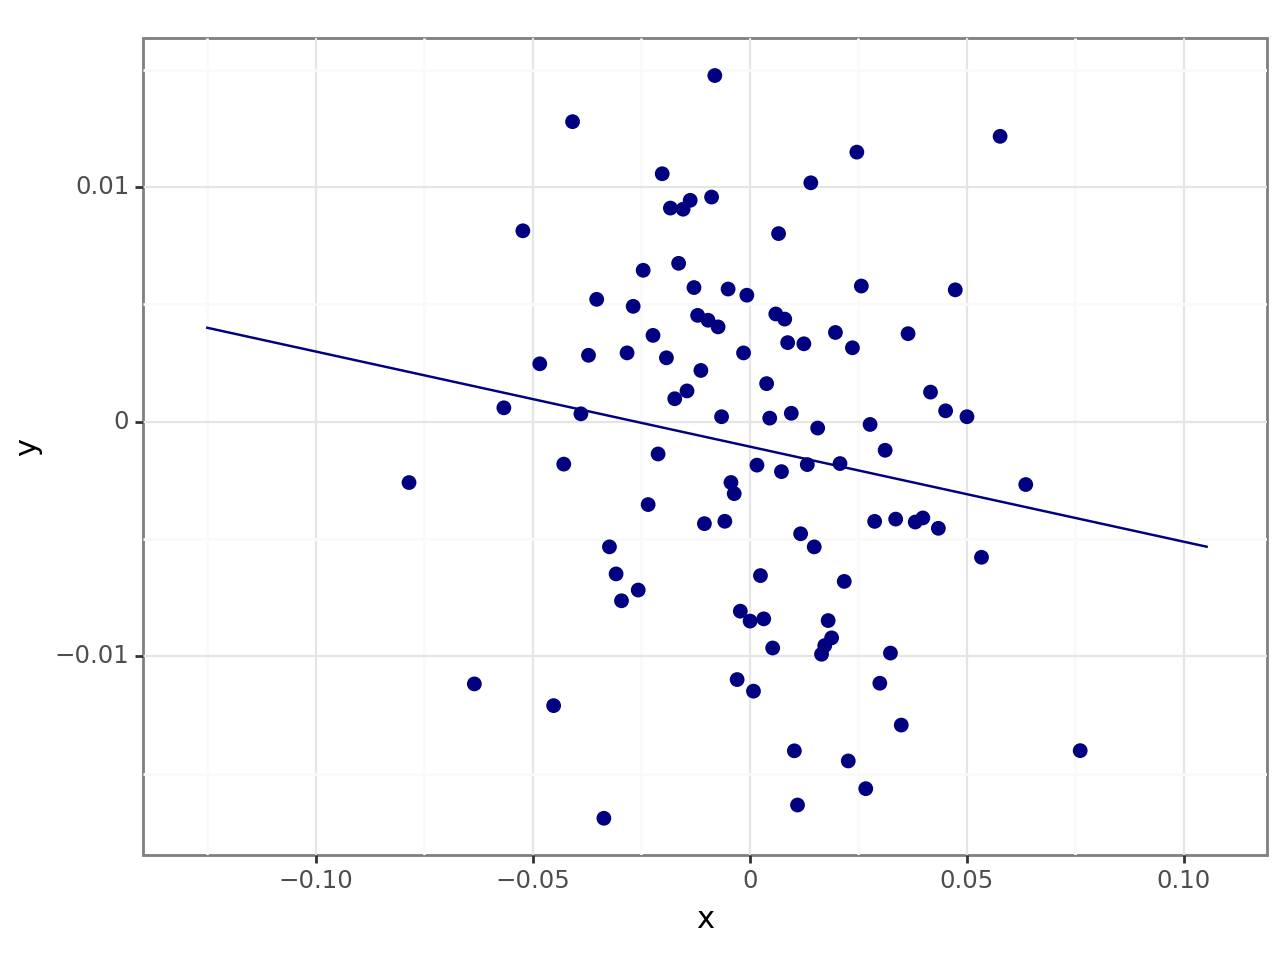


delta_log_barganing_l


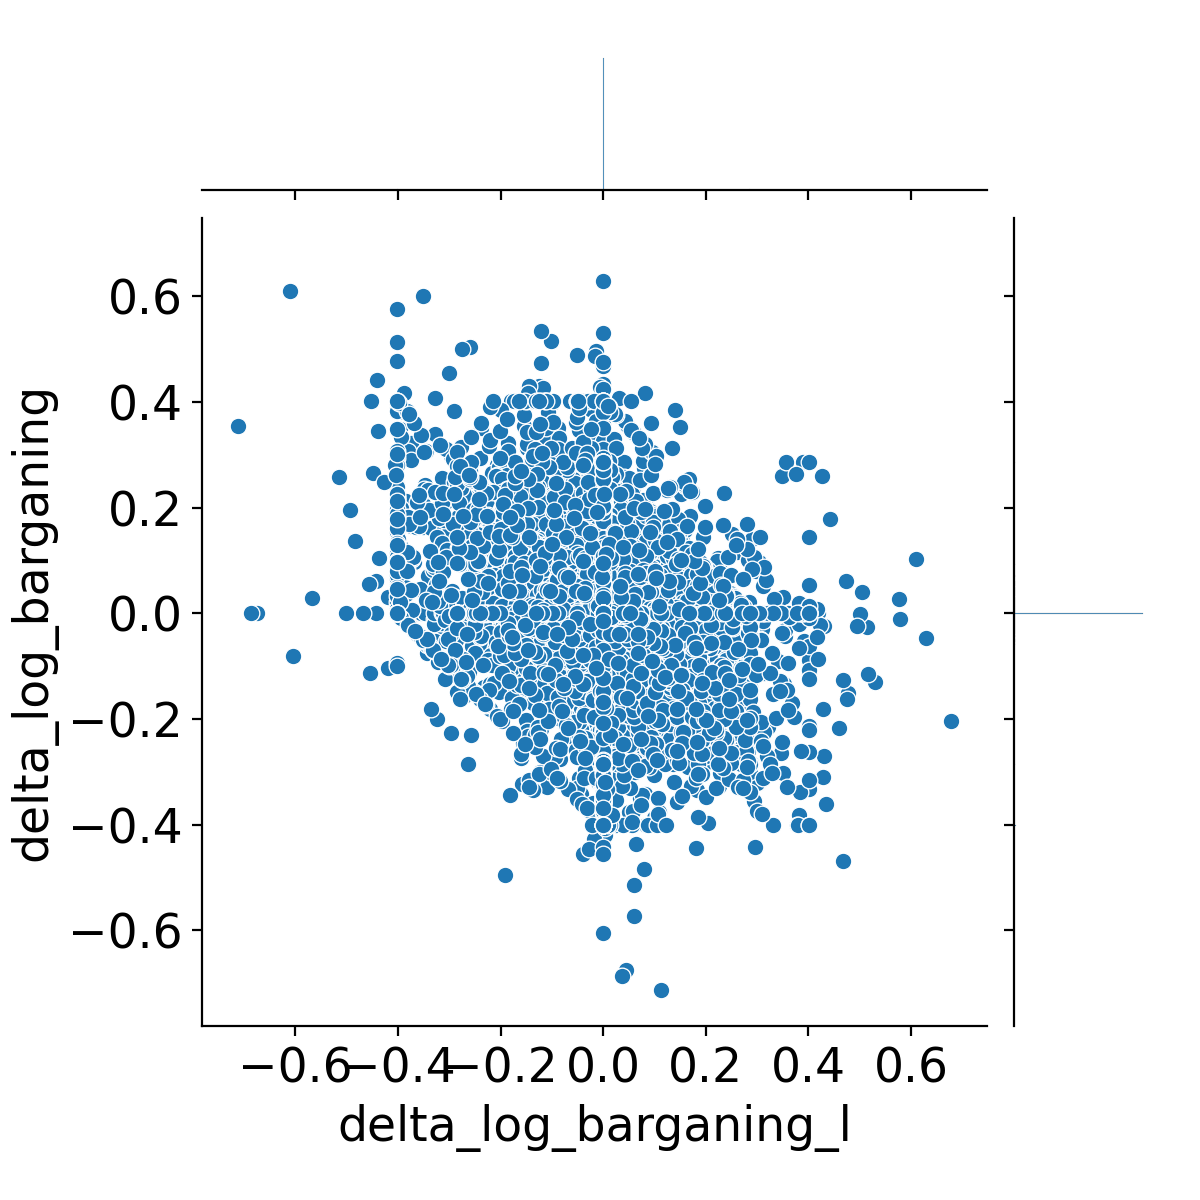

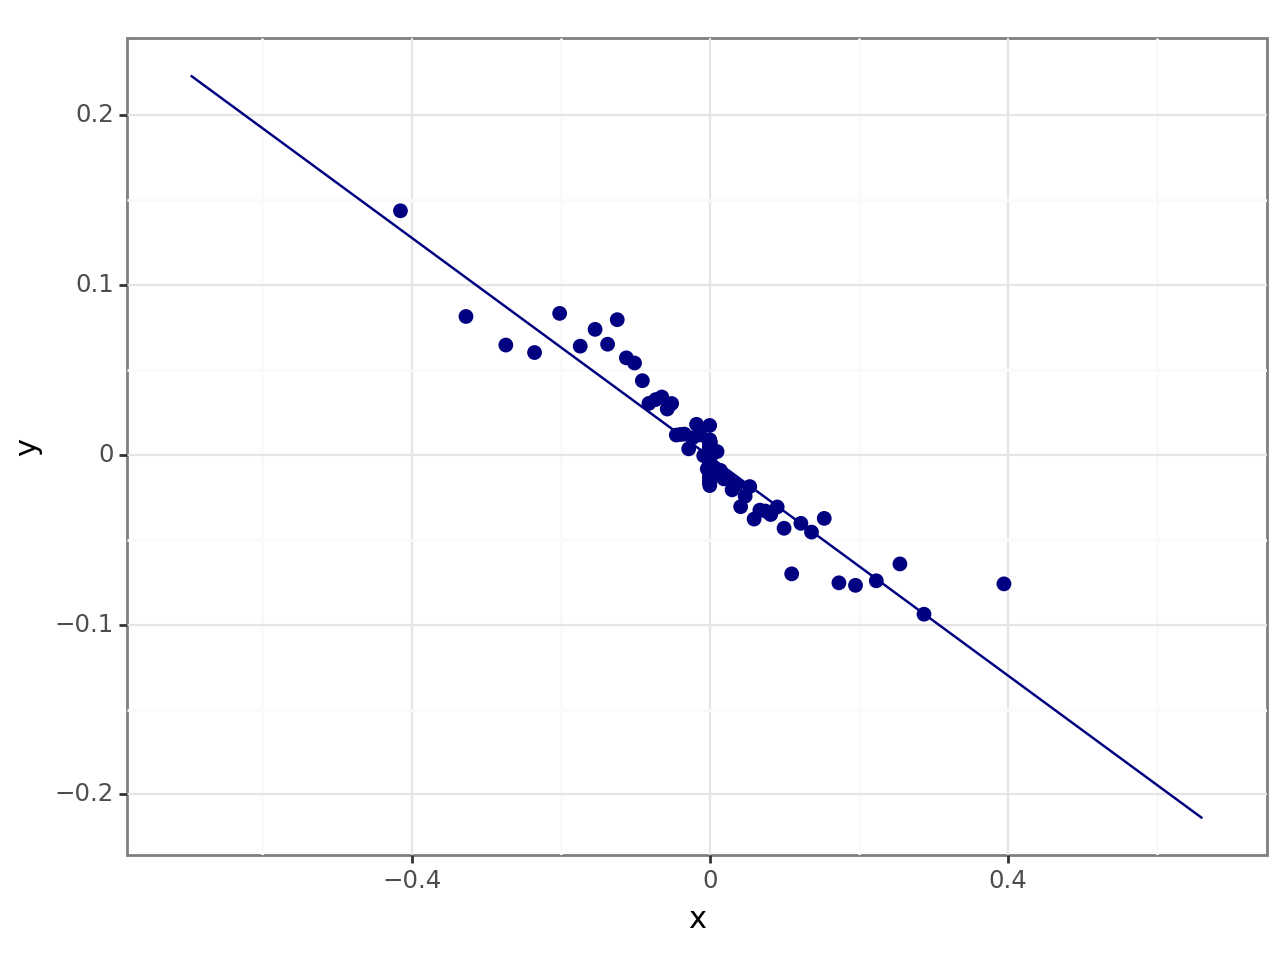

In [ ]:
#CORRELATION

data_regress = data
list =[ 'wage_shock','wage_shock_j','BMI','BMI_j','delta_log_wealth','delta_log_Love','delta_log_barganing_l']

list =[ 'wage_shock','wage_shock_j','delta_log_wealth','delta_log_Love','delta_log_barganing_l']
#list = ['wage_shock','wage_shock_j','delta_log_barganing_l']

#summary = data_regress[['delta_log_barganing']].describe()

for i in list:
    print(f'{i}')

    joint_plot = sns.jointplot(data_regress, x=f'{i}', y=f'delta_log_barganing')
    #joint_plot.fig.savefig(f'output/bargaining_x{i}_plot{model_name}_{gender}.png')
    #binspos='es' #like this equal spread does not work properly
    est = binsreg(data_regress['delta_log_barganing'],data_regress[f'{i}'], nbins=100,polyreg=1, noplot=False) #CANNOT GET TO SAVE AUTOMATICALLY
  





wage_shock


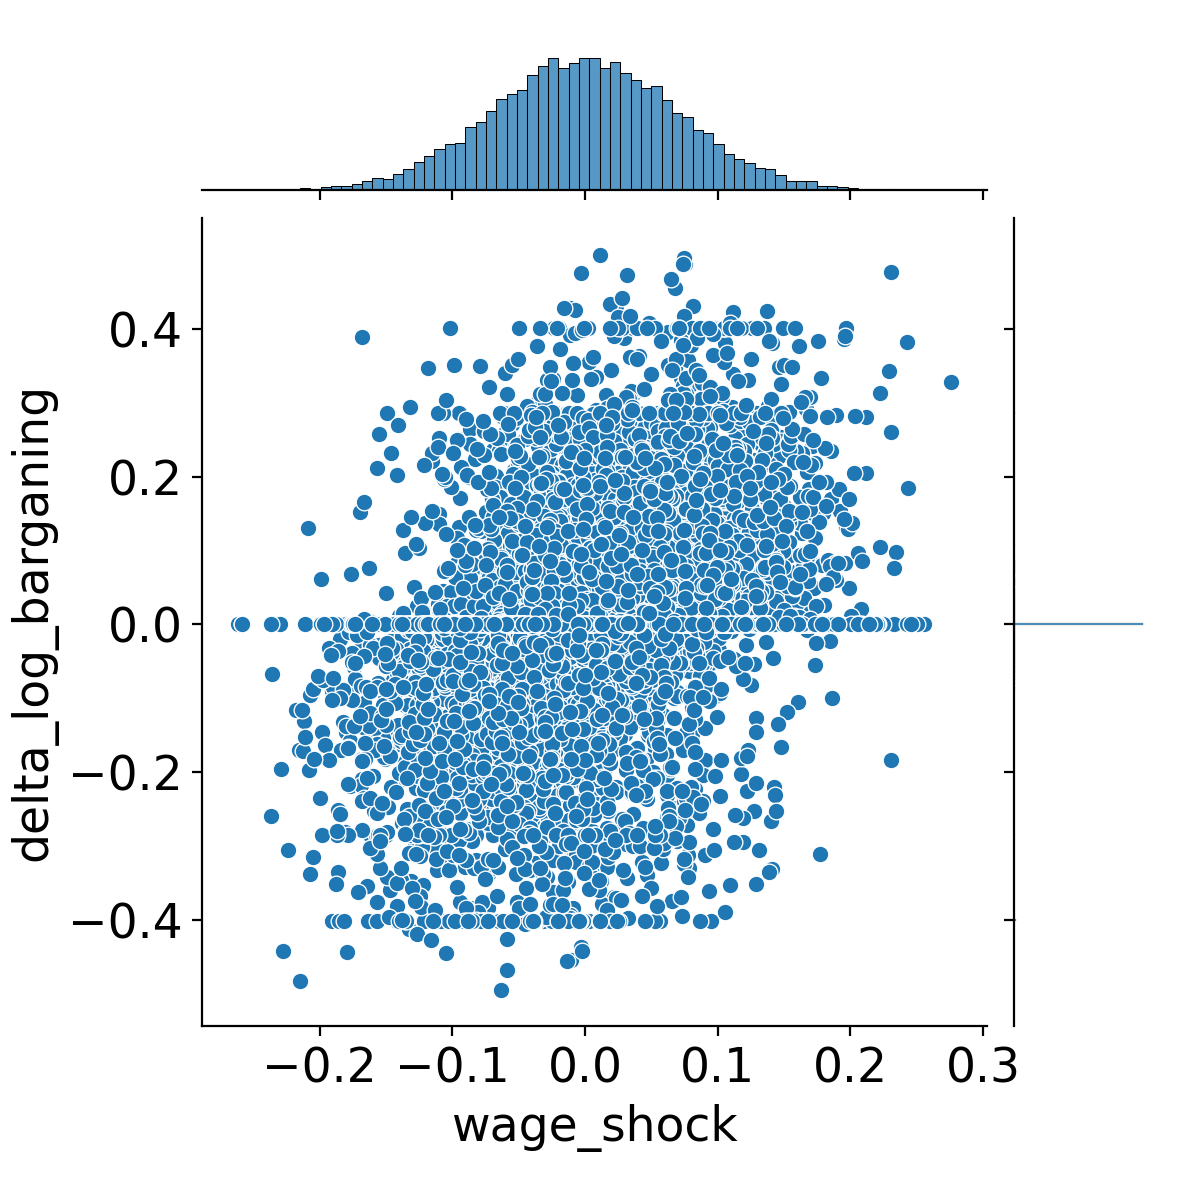

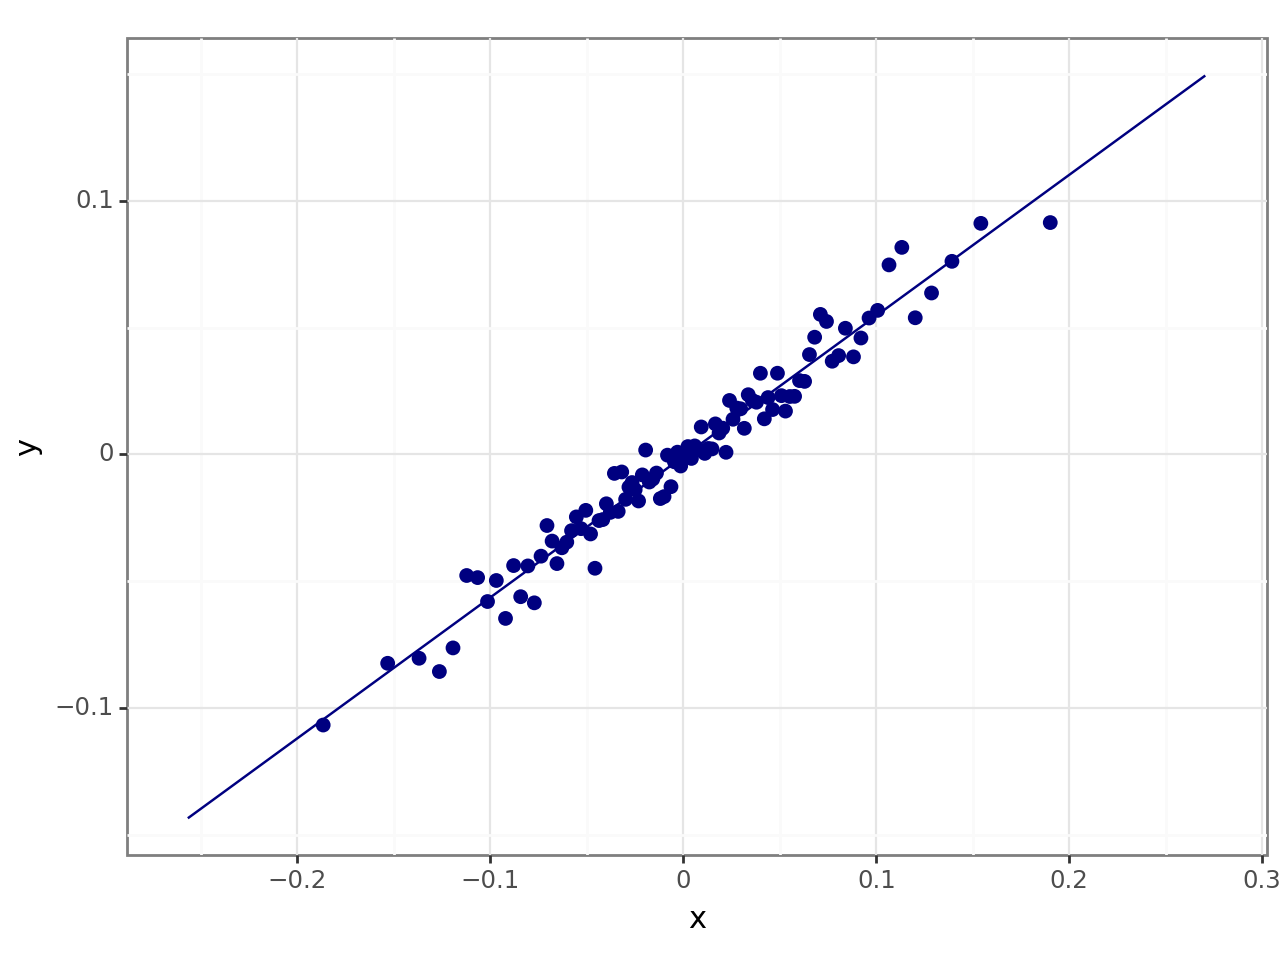


wage_shock_j


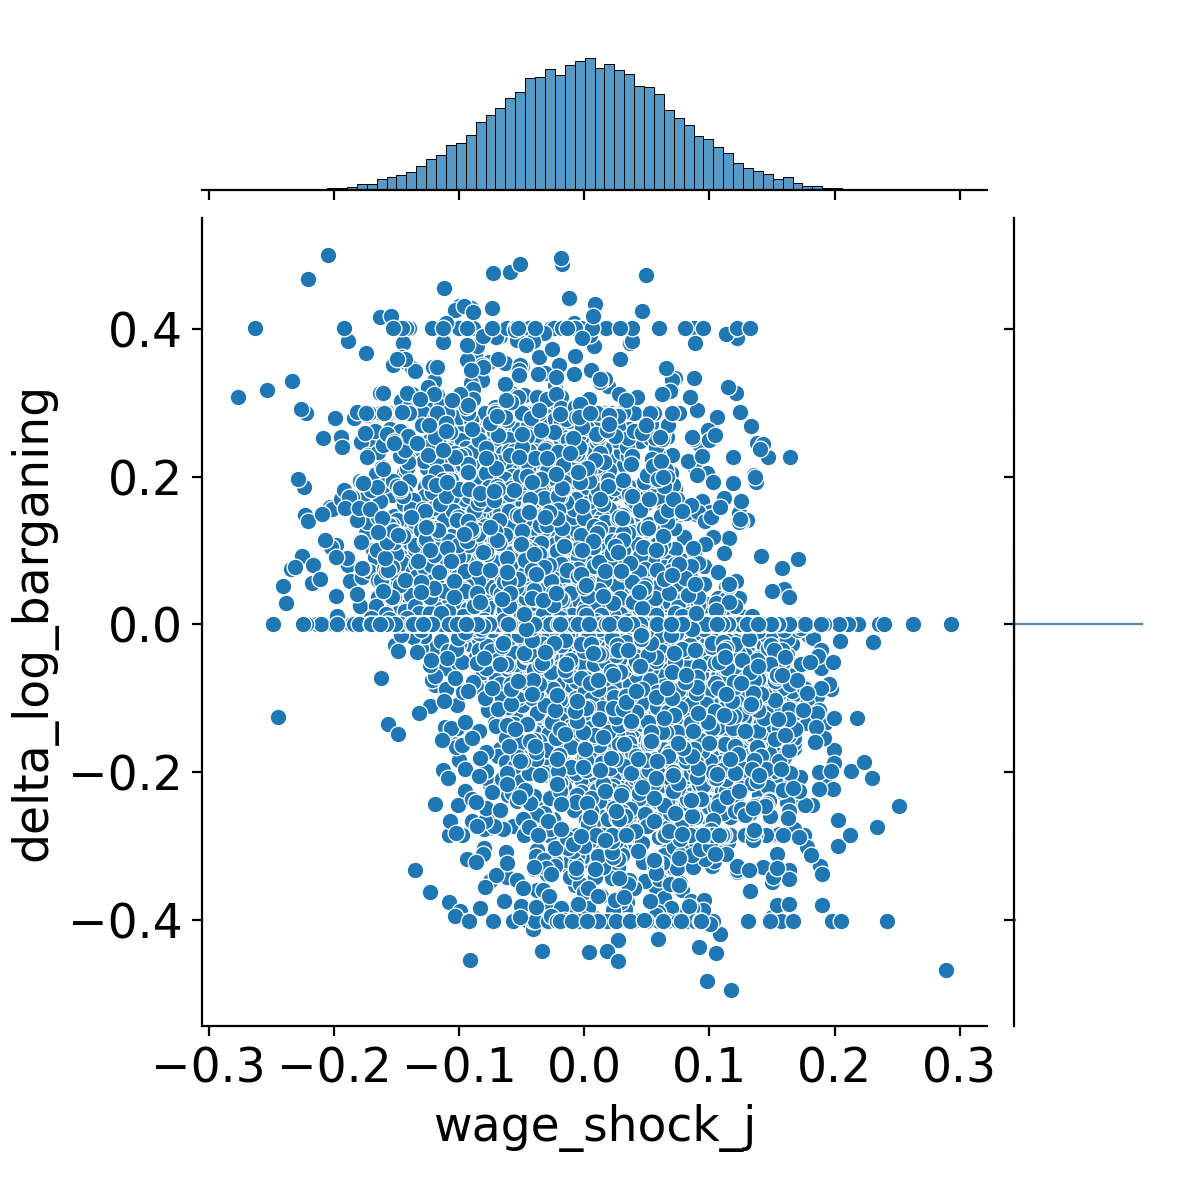

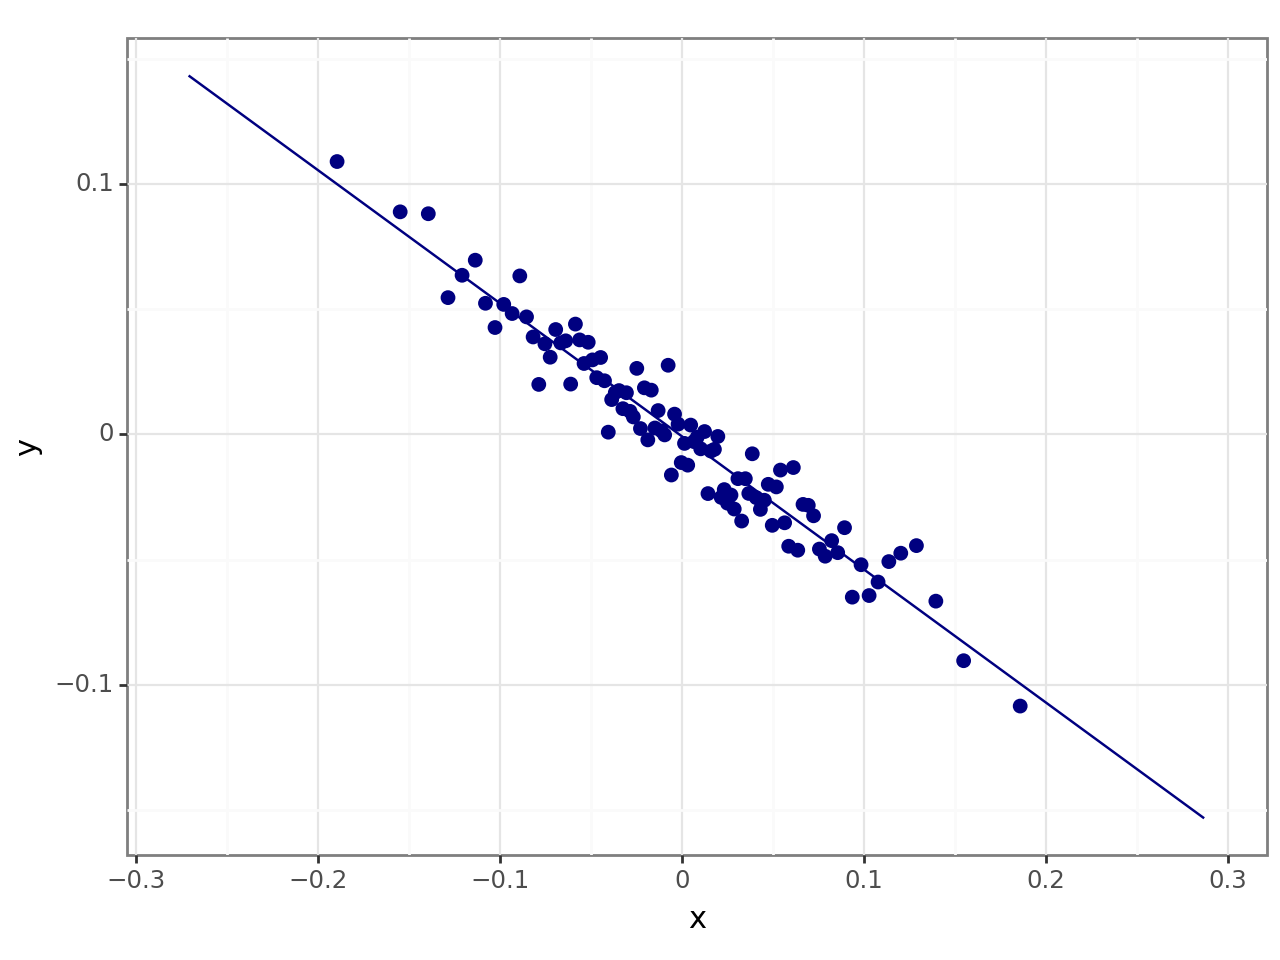


delta_log_wealth


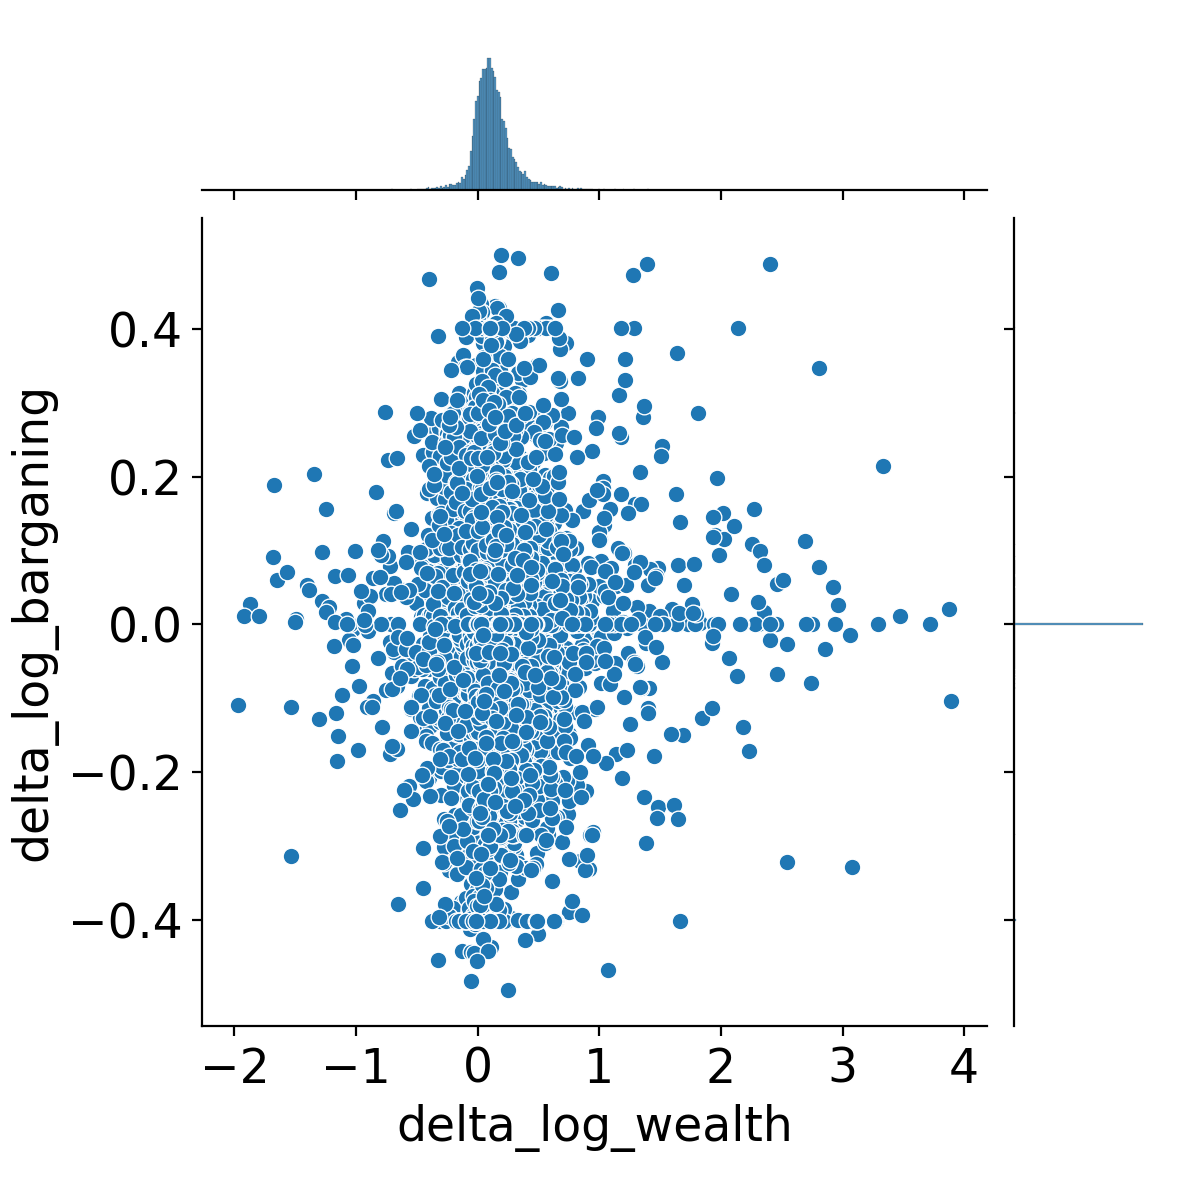

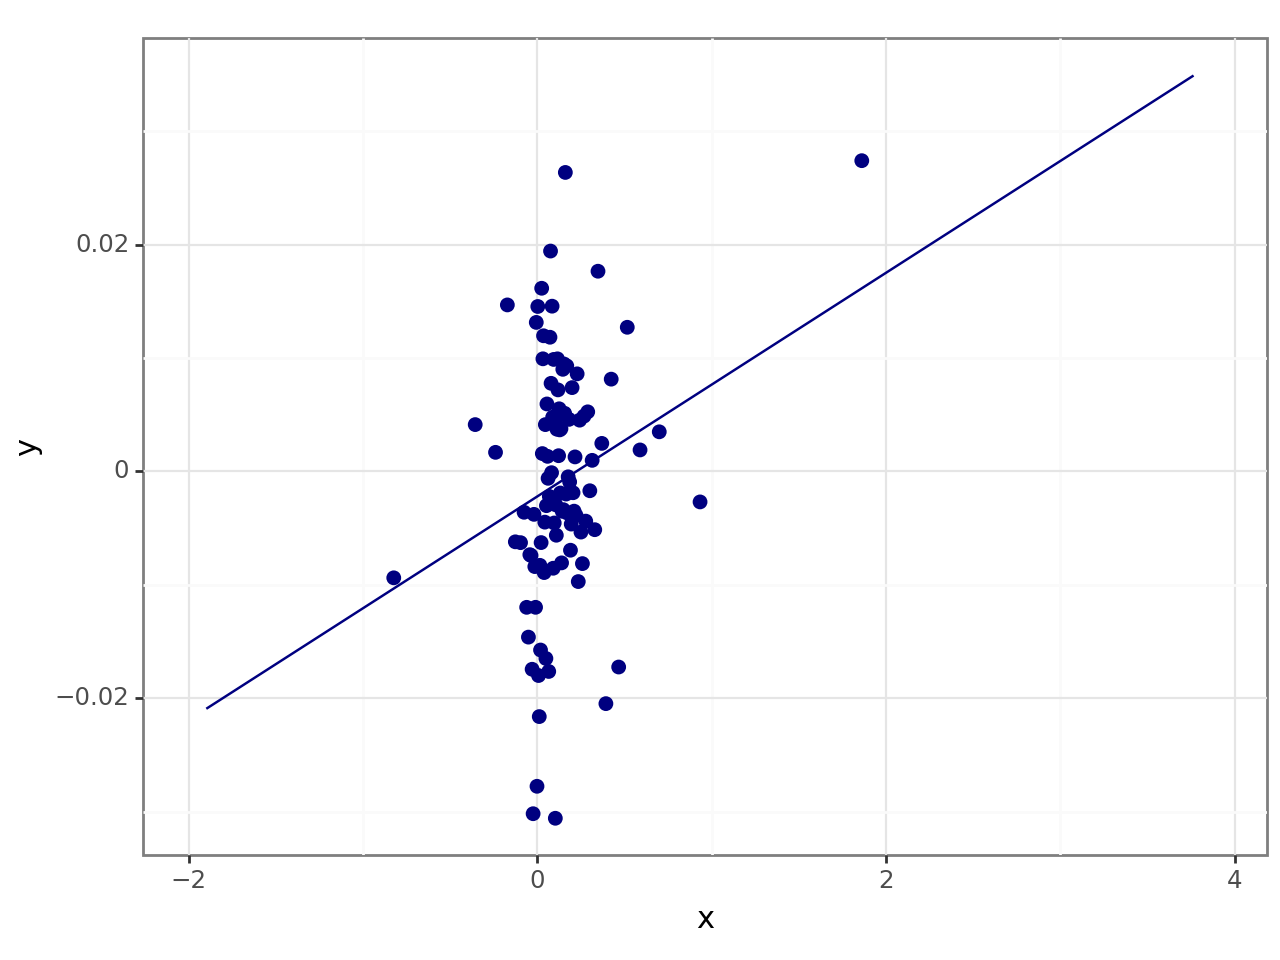


delta_log_Love


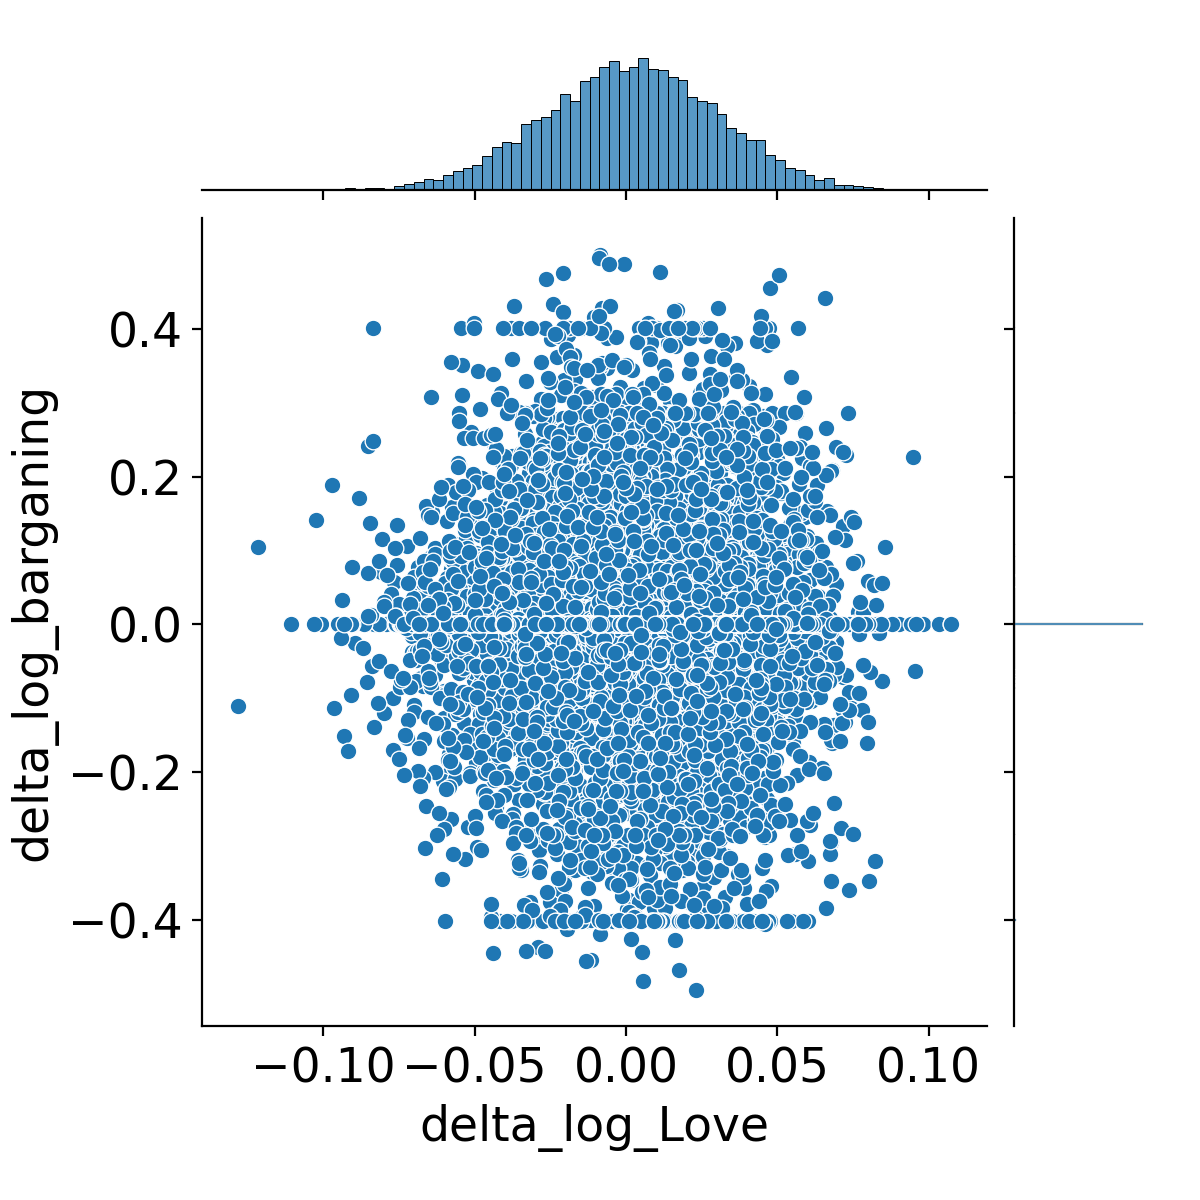

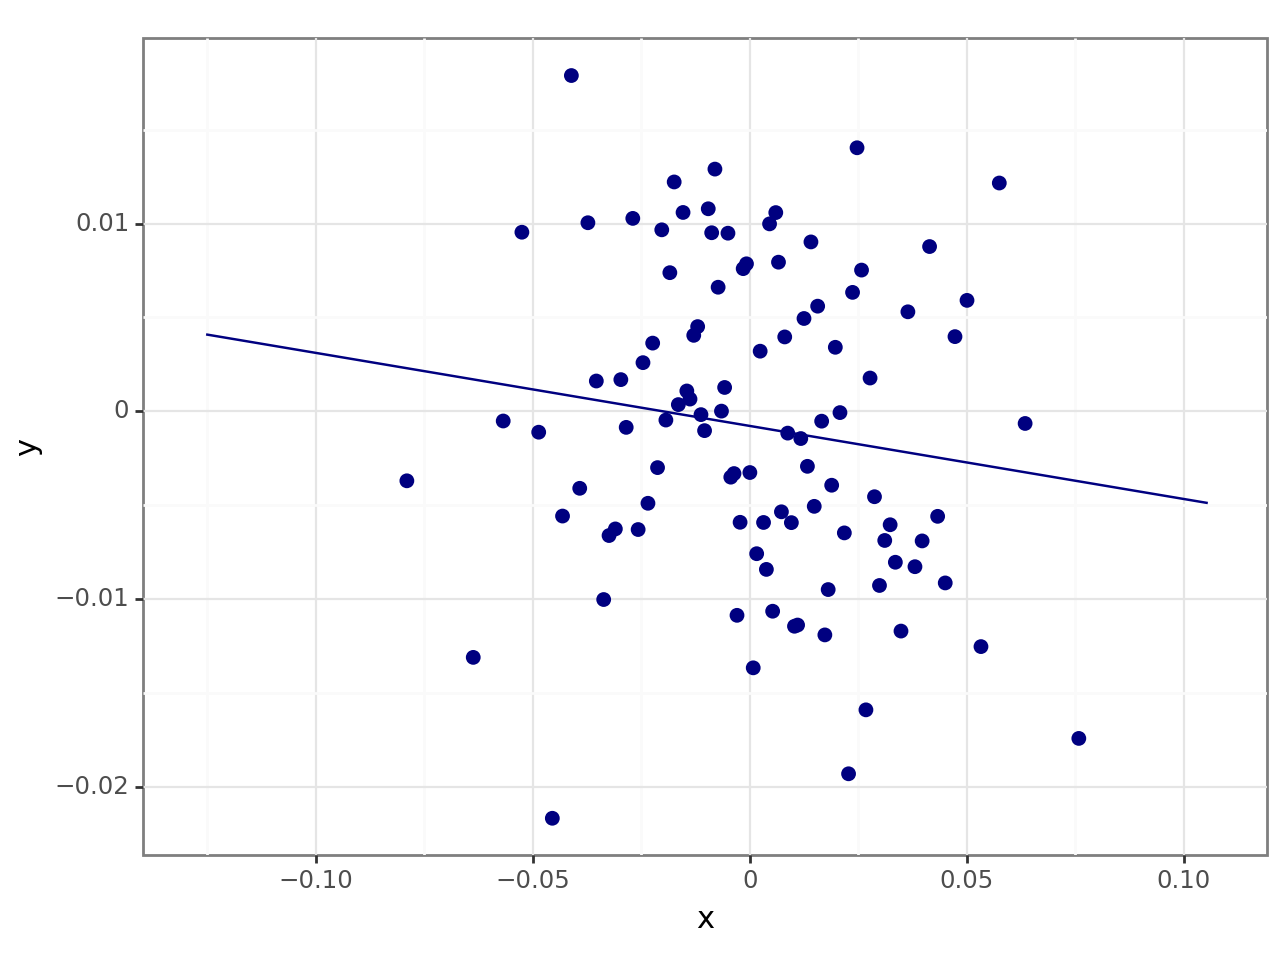


delta_log_barganing_l


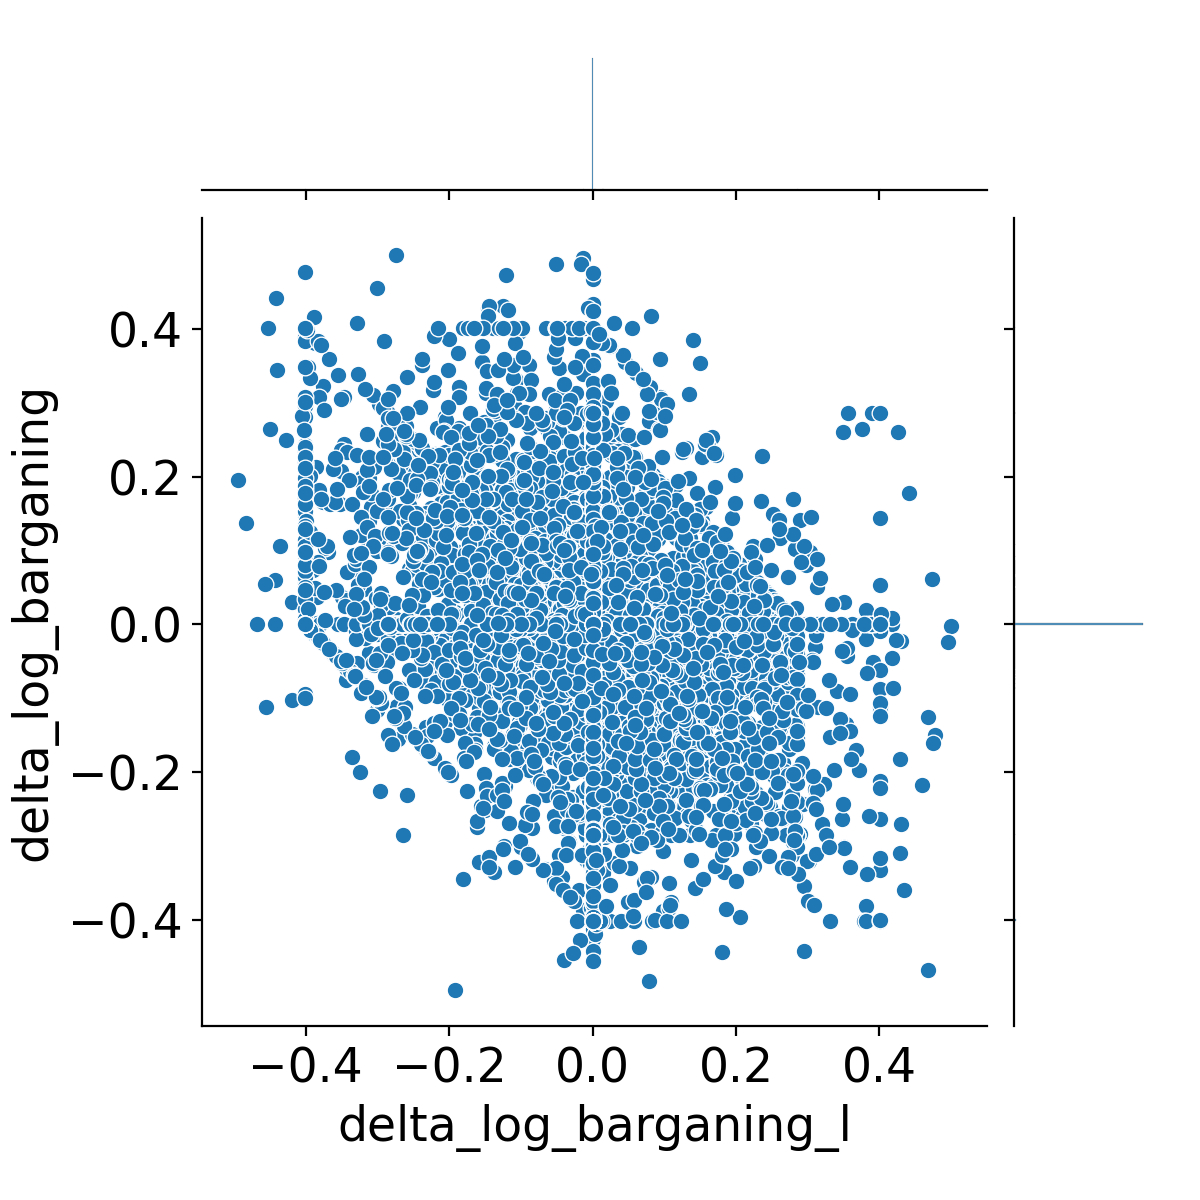

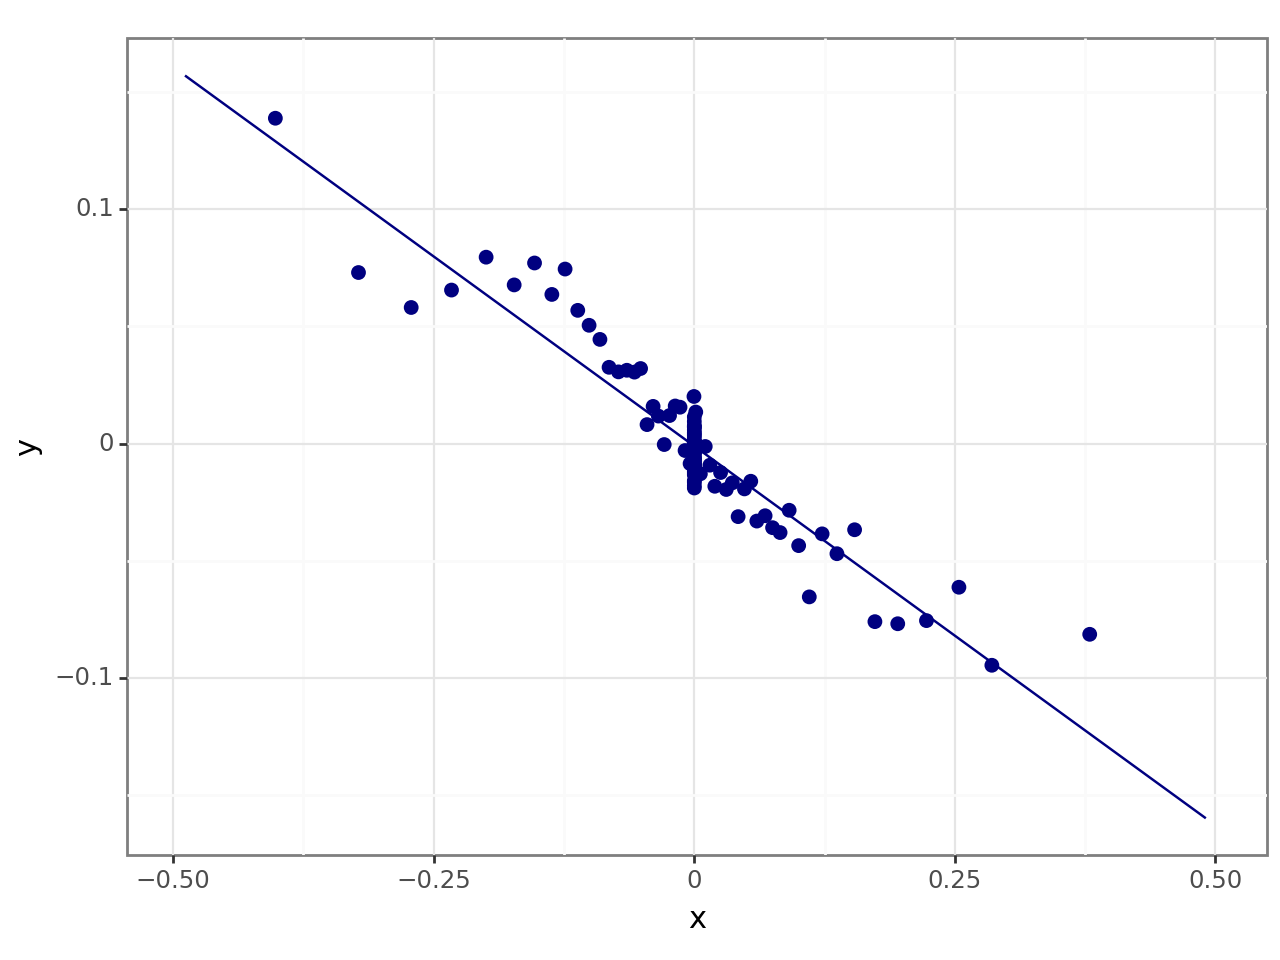

In [ ]:
data_regress = data
data_regress = data_regress[data_regress['delta_log_barganing']< 0.5]
data_regress = data_regress[data_regress['delta_log_barganing']> -0.5]
data_regress = data_regress[data_regress['delta_log_barganing']!= 0]


data_regress = data_regress[data_regress['delta_log_barganing_l']< 0.5]
data_regress = data_regress[data_regress['delta_log_barganing_l']> -0.5]
data_regress = data_regress[data_regress['delta_log_barganing_l']!= 0]



list =[ 'wage_shock','wage_shock_j','delta_log_wealth','delta_log_Love','delta_log_barganing_l']
for i in list:
    print(f'{i}')

    joint_plot = sns.jointplot(data_regress, x=f'{i}', y=f'delta_log_barganing')
    joint_plot.fig.savefig(f'output/bargaining_x{i}_plot{model_name}_{gender}_restrict.png')
    #binspos='es' #like this equal spread does not work properly
    est = binsreg(data_regress['delta_log_barganing'],data_regress[f'{i}'], nbins=100,polyreg=1, noplot=False) #CANNOT GET TO SAVE AUTOMATICALLY

#relationen bliver meget mindre kraftigt, for 0 --> trækker mode at ting bliver insignifikante selv i LC,

C:\Users\czk481\AppData\Local\Temp\2\ipykernel_11564\3383040555.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\czk481\AppData\Local\Temp\2\ipykernel_11564\3383040555.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\czk481\AppData\Local\Temp\2\ipykernel_11564\3383040555.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-frag

                             OLS Regression Results                            
Dep. Variable:     delta_log_barganing   R-squared:                       0.688
Model:                             OLS   Adj. R-squared:                  0.688
Method:                  Least Squares   F-statistic:                     4464.
Date:                 Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                         08:33:27   Log-Likelihood:                 19636.
No. Observations:                14200   AIC:                        -3.926e+04
Df Residuals:                    14192   BIC:                        -3.920e+04
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

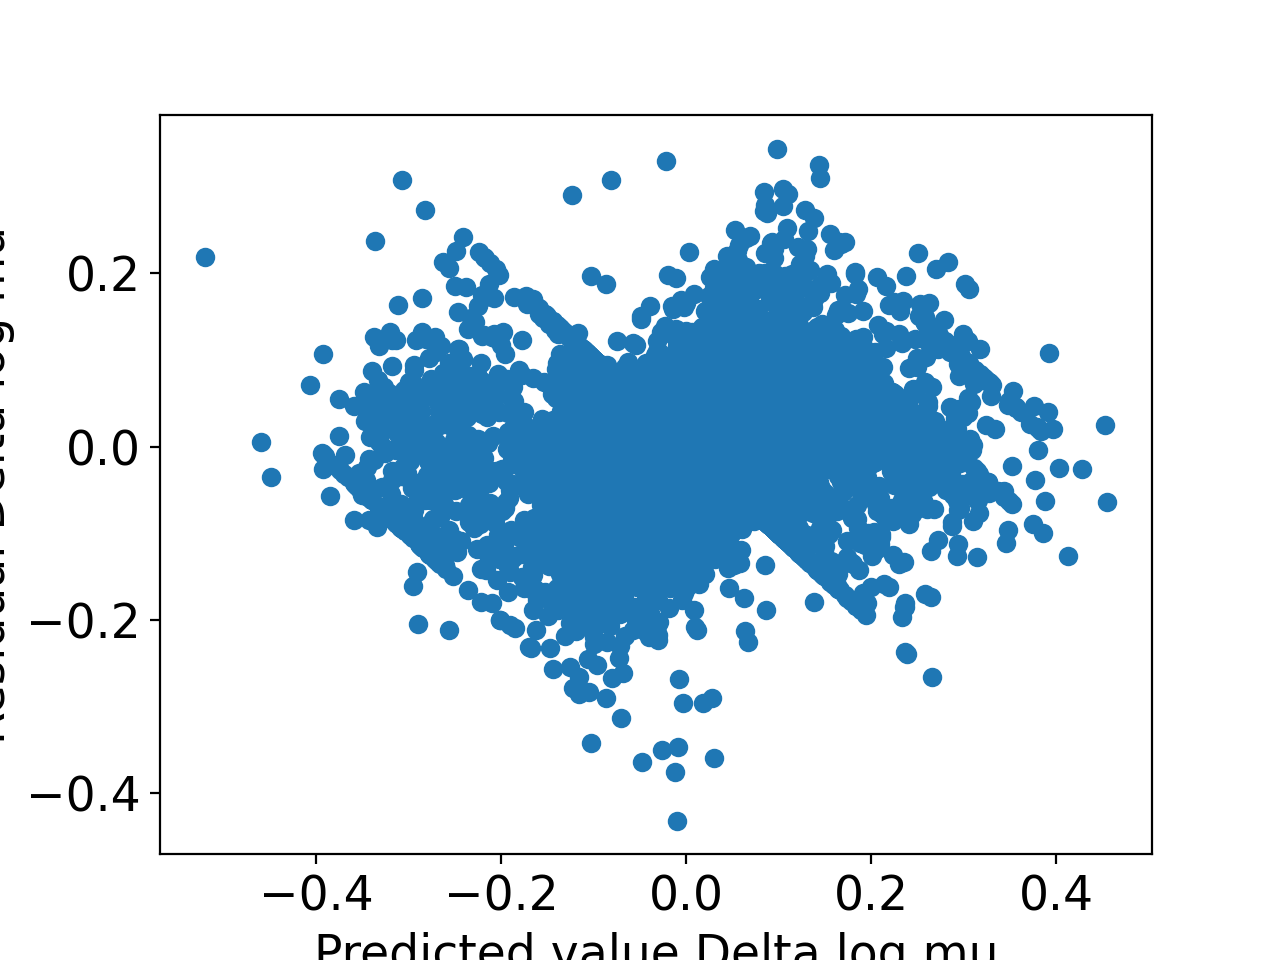

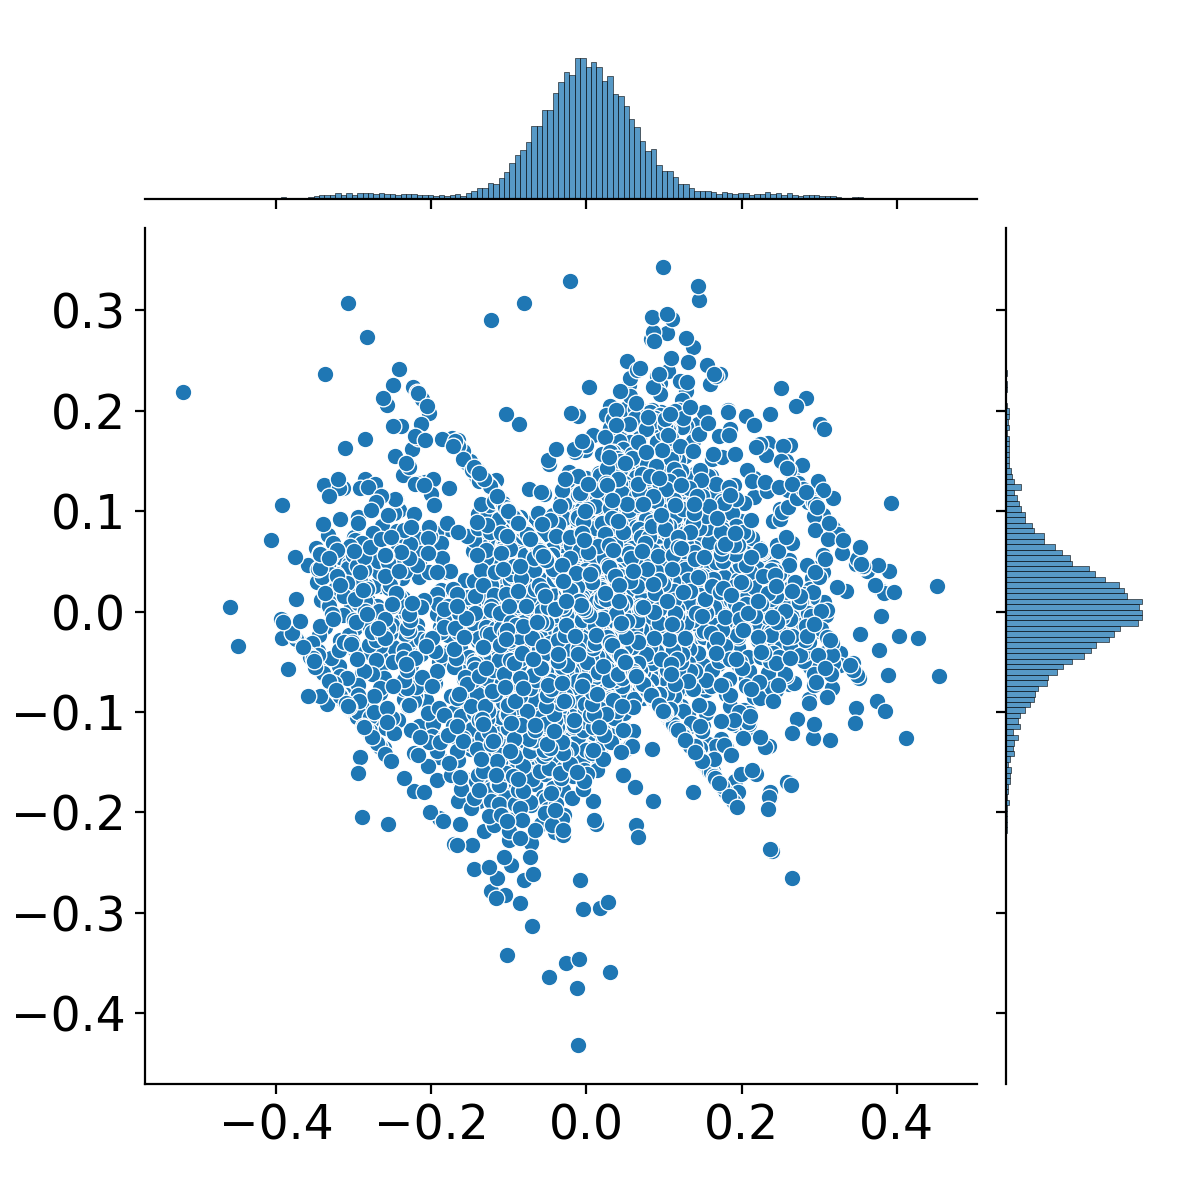

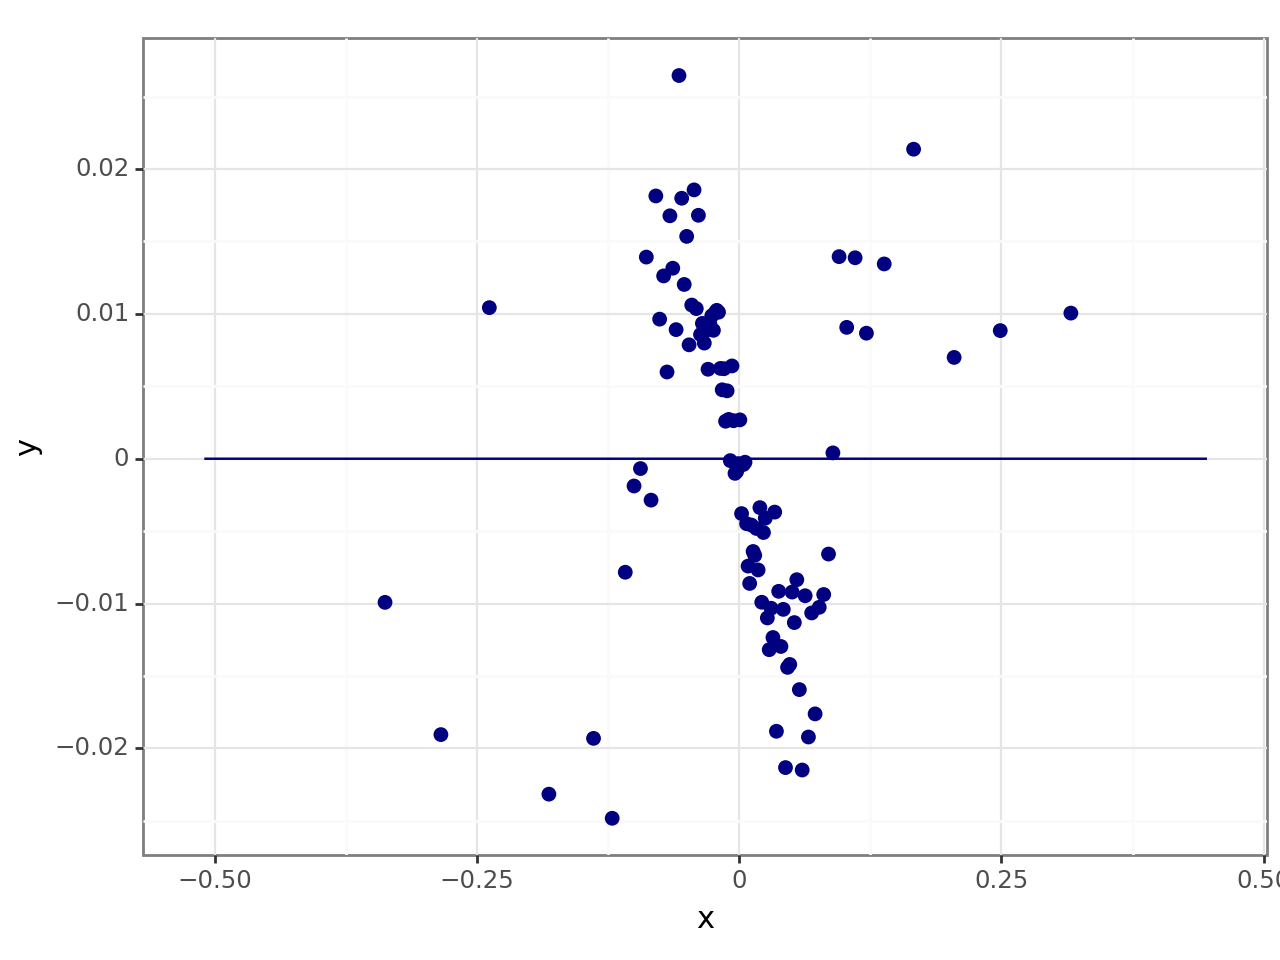


wage_shock


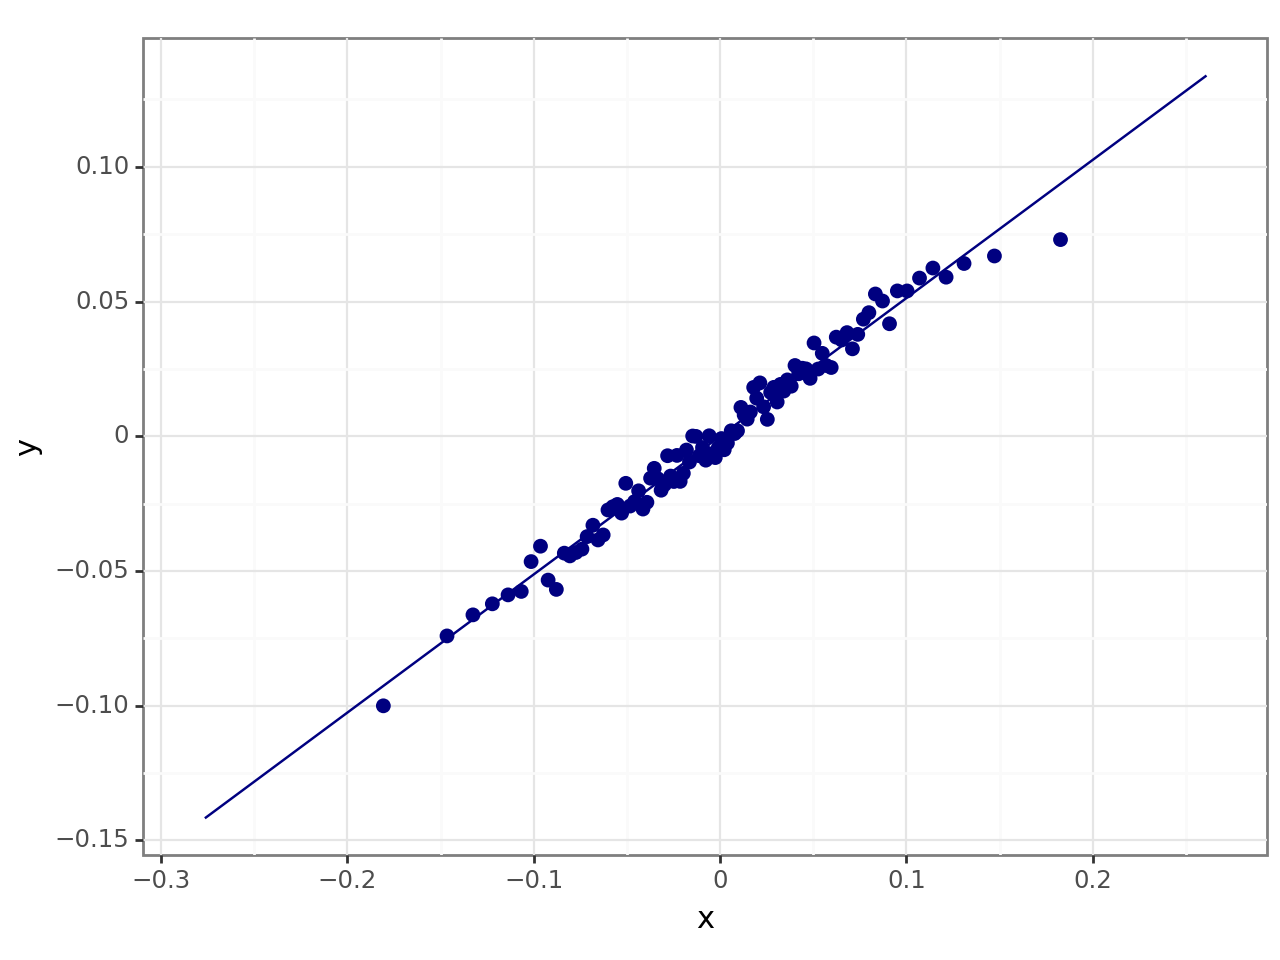


wage_shock_j


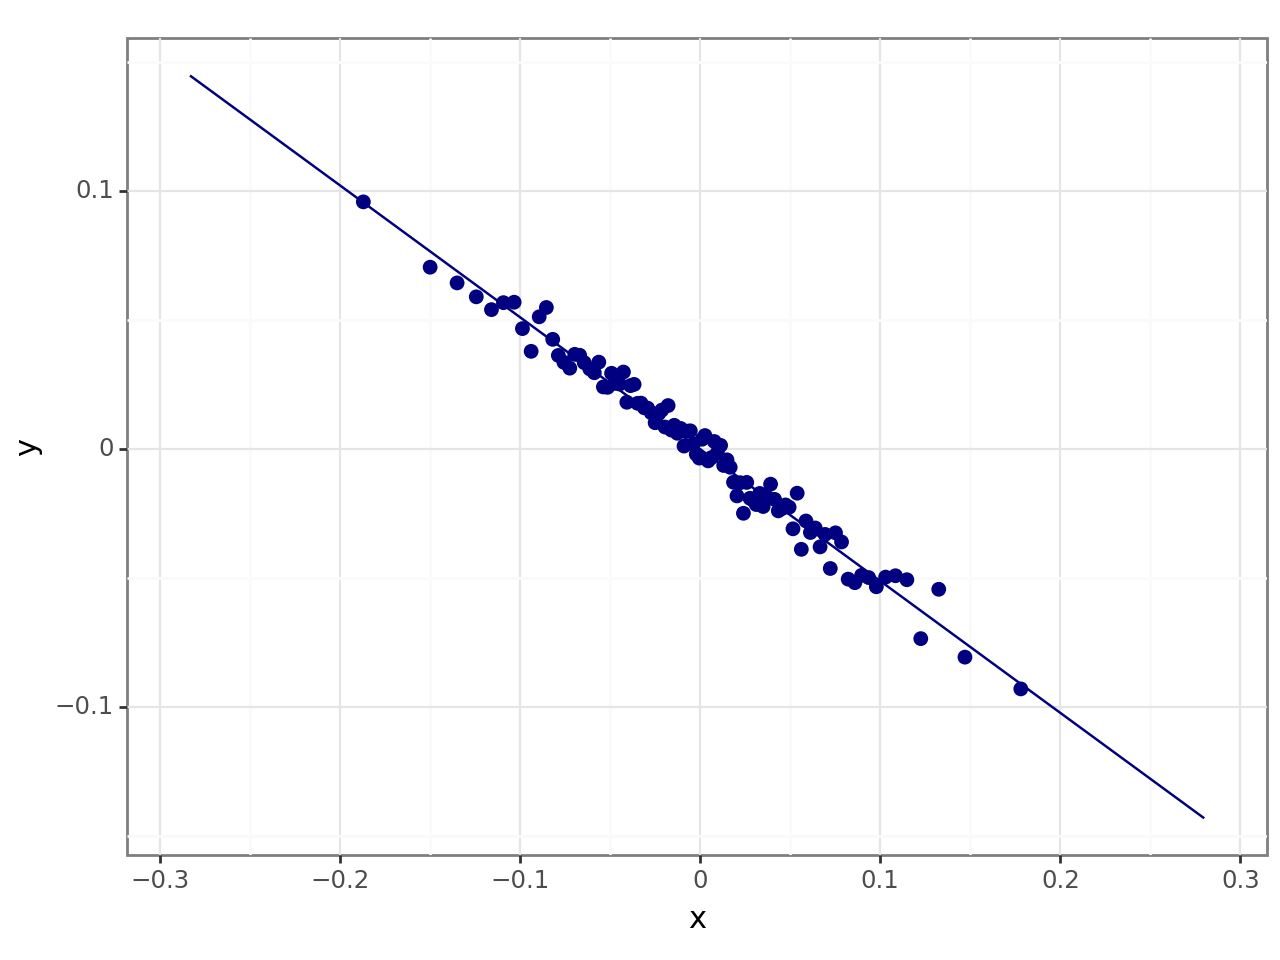


BMI


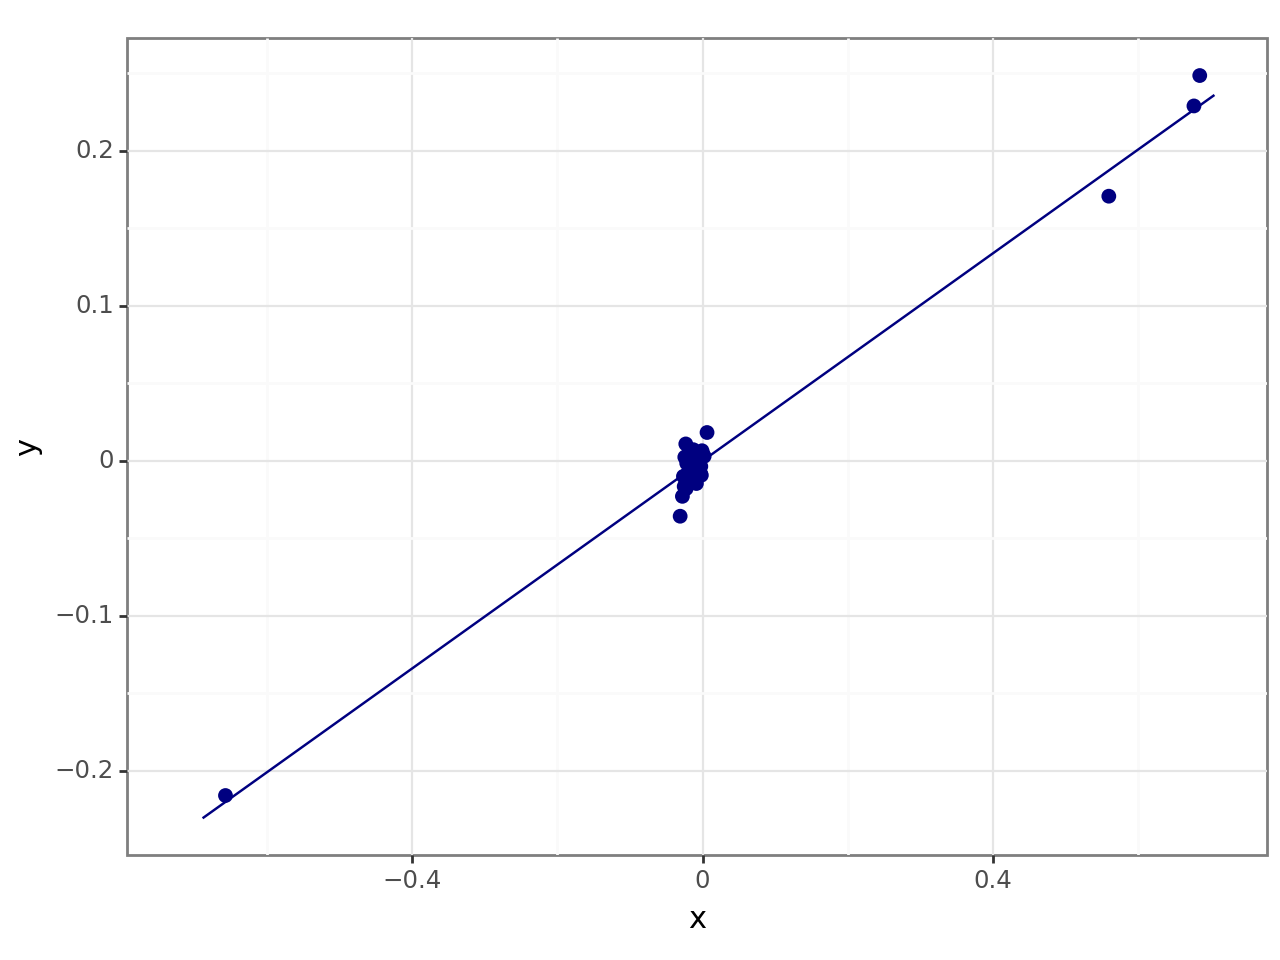


BMI_j


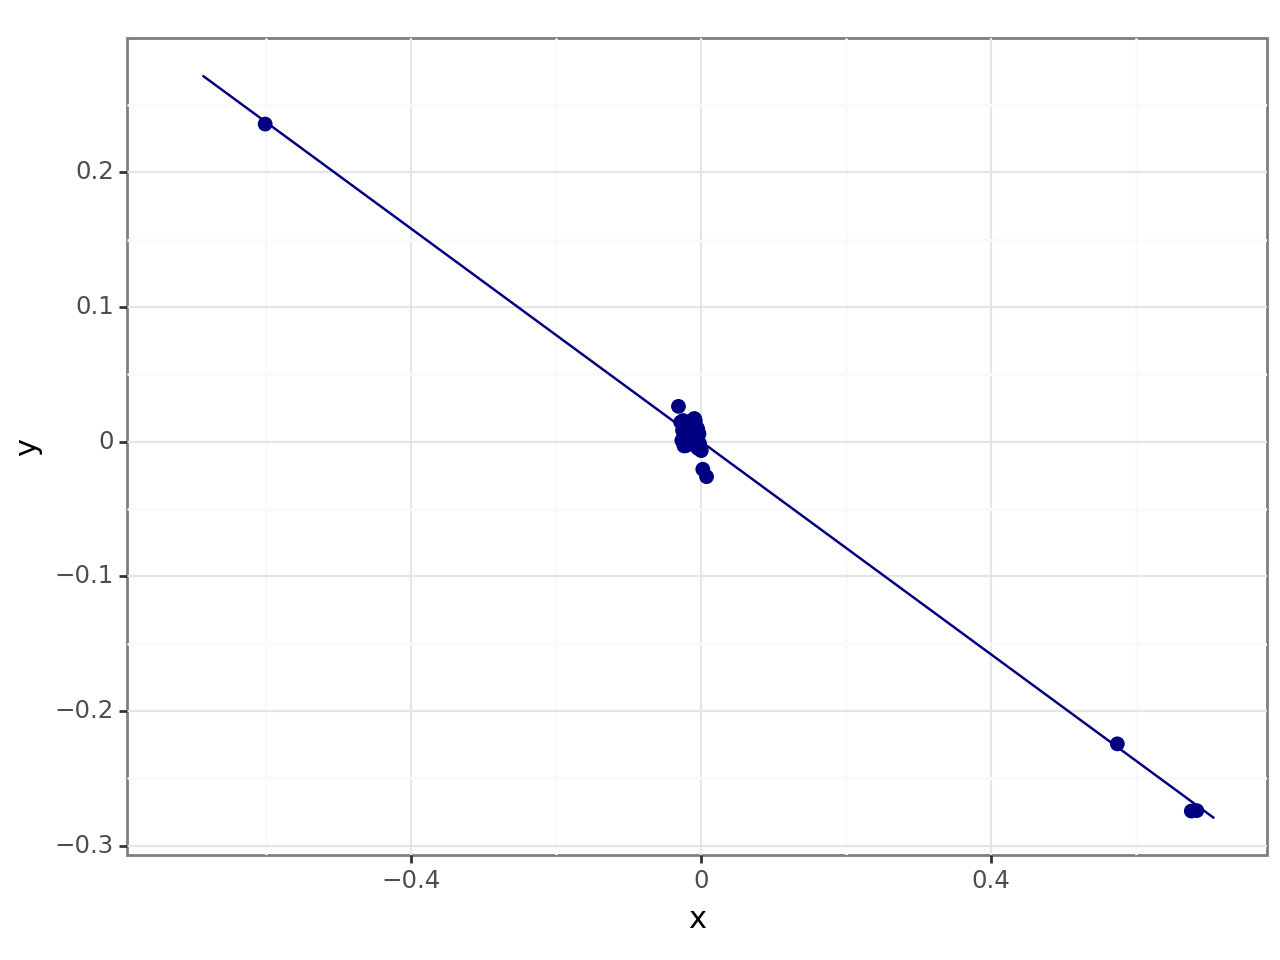


delta_log_barganing_l


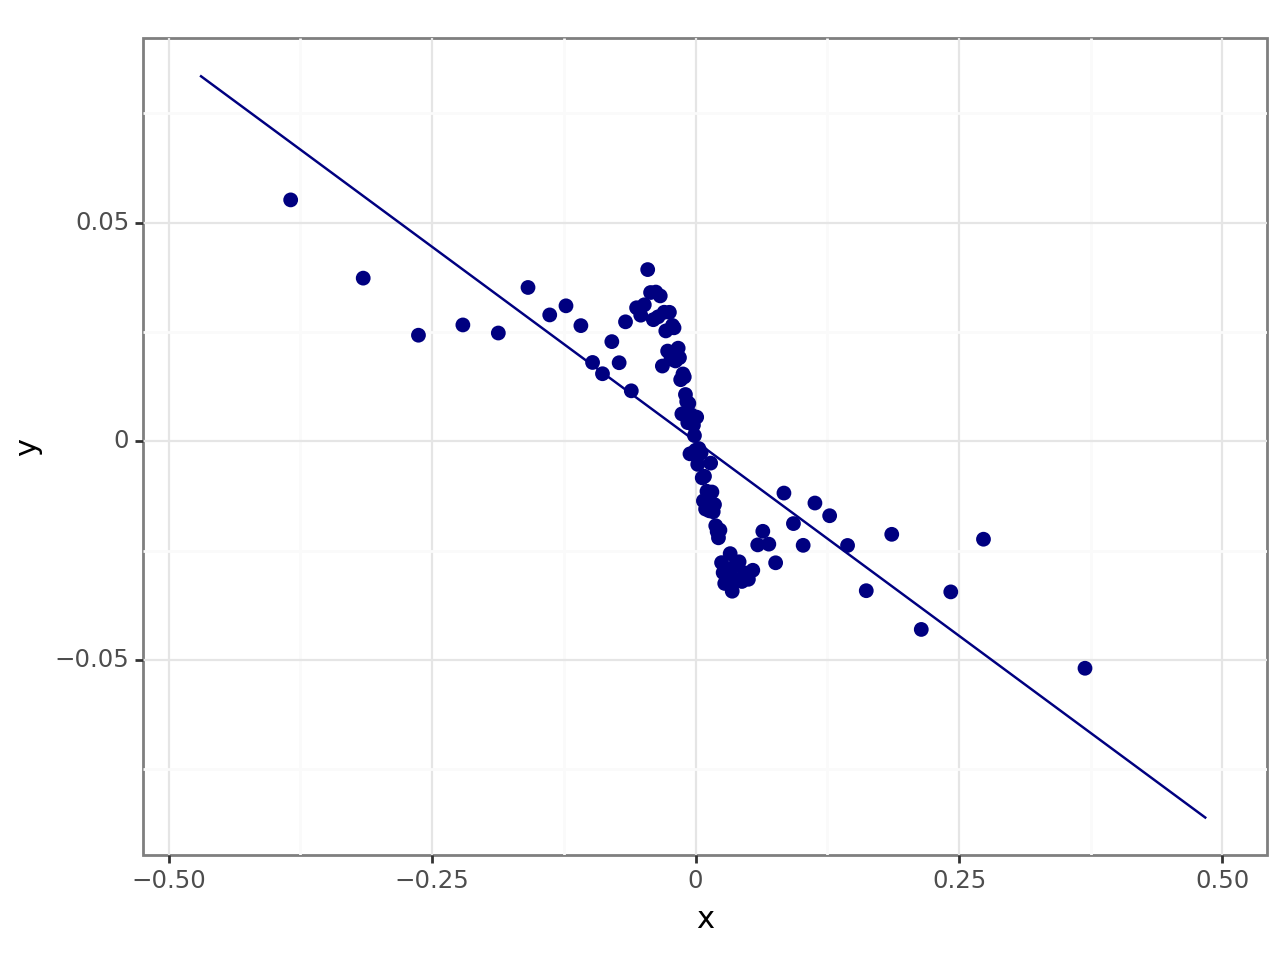

In [ ]:

gender = "w"
#Find the gender and the gender of the spouse
if gender == "w":
    spouse = "m"
elif gender =='m':
    spouse = "w"

    
data['wage_shock']=data[f'omega_res_{gender}']
data['wage_shock_l']=data[f'omega_res_{gender}_l']
data['wage_shock_l2']=data[f'omega_res_{gender}_l2']
data['wage_shock_j']=data[f'omega_res_{spouse}']
data['wage_shock_j_l']=data[f'omega_res_{spouse}_l']
data['wage_shock_j_l2']=data[f'omega_res_{spouse}_l2']


  
data['BMI'] = data[f'delta_log_BMI_{gender}']
data['BMI_l'] = data[f'delta_log_BMI_{gender}_l']
data['BMI_l2'] = data[f'delta_log_BMI_{gender}_l2']
data['BMI_j'] = data[f'delta_log_BMI_{spouse}']
data['BMI_j_l'] = data[f'delta_log_BMI_{spouse}_l']
data['BMI_j_l2'] = data[f'delta_log_BMI_{spouse}_l2']




data_regress = data[['delta_log_barganing', 'wage_shock','wage_shock_j','BMI','BMI_j','delta_log_wealth','delta_log_Love','delta_log_barganing_l','t']]
data_regress = data_regress[data_regress['delta_log_barganing']< 0.5]
data_regress = data_regress[data_regress['delta_log_barganing']> -0.5]
data_regress = data_regress[data_regress['delta_log_barganing']!= 0]

data_regress = data_regress[data_regress['delta_log_barganing_l']< 0.5]
data_regress = data_regress[data_regress['delta_log_barganing_l']> -0.5]
data_regress = data_regress[data_regress['delta_log_barganing_l']!= 0]

#DROP NAN
data_regress = data_regress.dropna() # det ser ud som om den ikke fjerner nogen

#data_regress = data_regress[data_regress['delta_log_barganing']< 0.5]
#data_regress = data_regress[data_regress['delta_log_barganing']> -0.5]
#data_regress = data_regress[data_regress['delta_log_barganing']!= 0]

#PREPARE T
#X_t=pd.get_dummies(data_regress ['t'], columns = ['t'], prefix = 'D_t', dtype = float, drop_first=True,  ) 
#X_t = X_t.drop(columns = ['D_t_13']) #drop reference cat


    


df = data_regress.drop(columns = ['delta_log_barganing','t'])
#df = df.drop(columns = ['delta_log_Love','delta_log_Love_l','delta_log_Love_l2'])
    

#REGRESS

y  =  data_regress[['delta_log_barganing']]
x1 = df
x1 = sm.add_constant(x1)  

result2= sm.OLS(y,x1).fit()
print(result2.summary())
res = result2.resid
predict = result2.predict()
data_regress['res']  = res
data_regress['predict']  = predict

print('residual plot')
plt.scatter(predict,res)
plt.ylabel("Residual Delta log mu")
plt.xlabel(f'Predicted value Delta log mu')

plt.savefig(f'output/barg_res_predict_plot{model_name}_{gender}.png')
plt.show()
joint_plot = sns.jointplot(data_regress, x=predict, y=res)
est = binsreg(res,predict, nbins=100,polyreg=1, noplot=False) 


#print('res against y')
#plt.scatter(data_regress[['delta_log_barganing']],res)
#plt.show()
list = ['wage_shock','wage_shock_j','BMI','BMI_j','delta_log_wealth','delta_log_Love','delta_log_barganing_l']

list = ['wage_shock','wage_shock_j','BMI','BMI_j','delta_log_barganing_l']
for i in list :
    

    xlabel = f'{i}'
    if i == "wage_shock":
        xlabel = "Shock to wage"
    elif i == "wage_shock_j":
        xlabel = "Shock to partners wage"
    elif i == "delta_log_barganing_l":
        xlabel = "Change in barganing weigth, lag"

    data_regress_neg = data_regress[data_regress[f'{i}']<0]
    data_regress_pos = data_regress[data_regress[f'{i}']>0]
    x = x1
    y2 = x[f'{i}']
    x = x.drop(columns = [f'{i}'])
    
    #x = x.drop(columns = list_drop)
    #x = x.T.drop_duplicates().T #drop duplicates
    x = sm.add_constant(x)  
    
    result= sm.OLS(y,x).fit()
    res_y = result.resid
    data_regress[f'res_y'] = res_y
    
    result= sm.OLS(y2,x).fit()
    res_x = result.resid
    #data_regress[[f'res_x']]=res_x


    
    #joint_plot = sns.jointplot(data_regress, x='res_x', y='res_y')
    print(f'{i}')
    est = binsreg(res_y,res_x, nbins=100,polyreg=1, noplot=False) 
    
  
   
